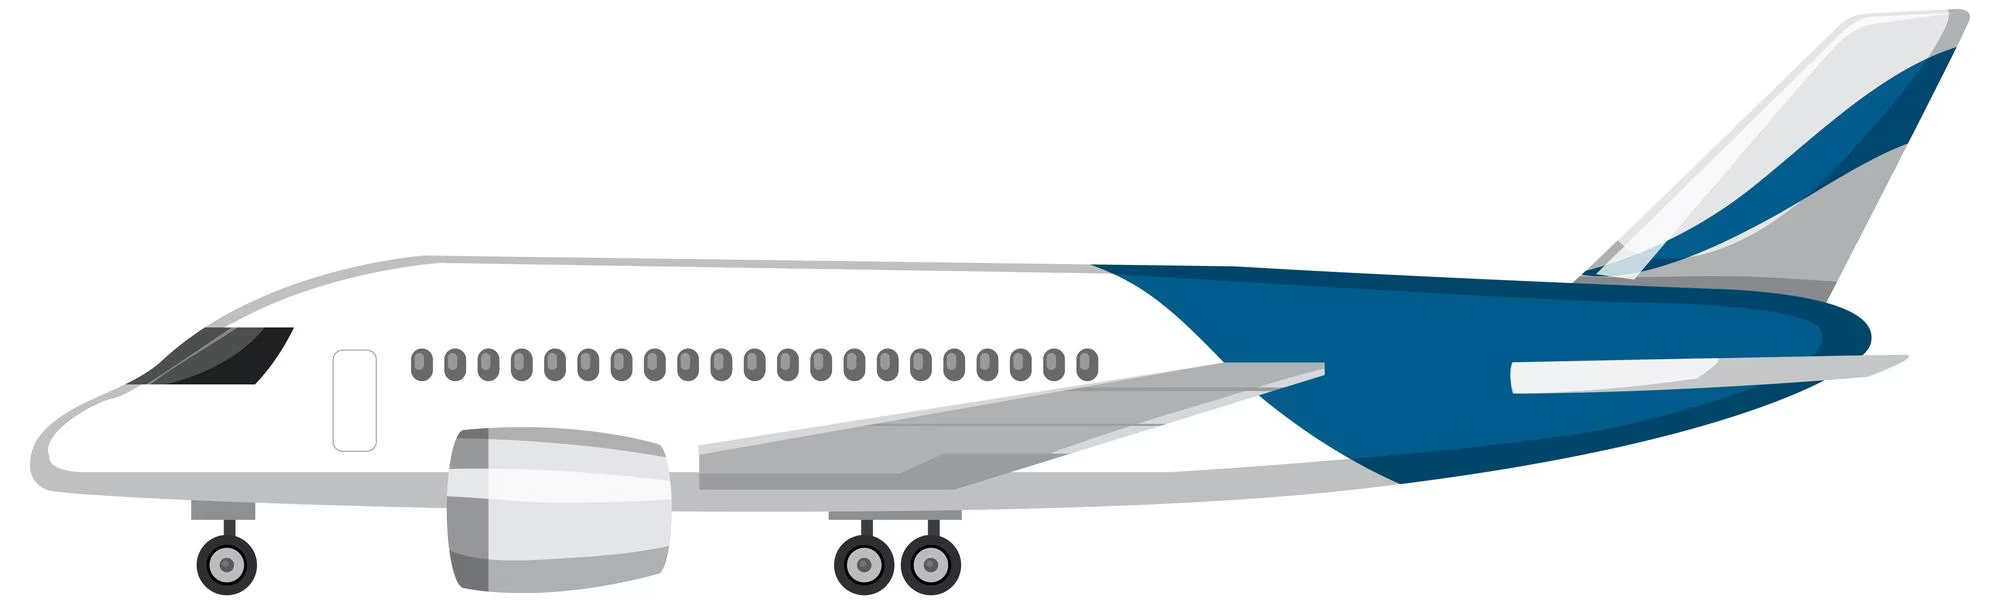

## __In the era of global travel, ensuring a delightful flying experience for passengers is a top priority for airlines. Airlines strive to understand the factors taht contribute to passenger satisfaction and dissatisfaction. In this context, I'm tasked with developing a predictive model that can determine the key factors strongly correlated with passenger satisfaction and dissatisfaction, and unlitmately predict whether a passenger is likely to be satisfied or dissatisfied based on various attributes.__

#### __CONTENT:__
- ##### _Gender: Gender of the passengers (Female, Male)_
- ##### _Customer Type: The customer type (Loyal customer, disloyal customer)_
- ##### _Age: The actual age of the passengers_
- ##### _Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)_
- ##### _Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)_
- ##### _Flight distance: The flight distance of this journey_
- ##### _(0:Not Applicable;1-5)_
- ##### _Inflight wifi service: Satisfaction level of the inflight wifi service_
- ##### _Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient_
- ##### _Ease of Online booking: Satisfaction level of online booking_
- ##### _Gate location: Satisfaction level of Gate location_
- ##### _Food and drink: Satisfaction level of Food and drink_
- ##### _Online boarding: Satisfaction level of online boarding_
- ##### _Seat comfort: Satisfaction level of Seat comfort_
- ##### _Inflight entertainment: Satisfaction level of inflight entertainment_
- ##### _On-board service: Satisfaction level of On-board service_
- ##### _Leg room service: Satisfaction level of Leg room service_
- ##### _Baggage handling: Satisfaction level of baggage handling_
- ##### _Check-in service: Satisfaction level of Check-in service_
- ##### _Inflight service: Satisfaction level of inflight service_
- ##### _Cleanliness: Satisfaction level of Cleanliness_
- ##### _Departure Delay in Minutes: Minutes delayed when departure_
- ##### _Arrival Delay in Minutes: Minutes delayed when Arrival_
- ##### _Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)_

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### _Some helper functions._

In [120]:
from scipy import stats

# plt.style.use('fivethirtyeight')

def three_charts(series):
    fig = plt.figure(figsize=(12, 8))
    grid = plt.GridSpec(nrows=2, ncols=3, wspace=0.4, hspace=0.3)

    ax1 = fig.add_subplot(grid[0, :2])
    ax2 = fig.add_subplot(grid[:, 2])
    ax3 = fig.add_subplot(grid[1, :2])

    ax1.set_title("Histogram X KDE")
    ax1.set_xlabel(series.name)
    sns.distplot(x=series, ax=ax1)

    ax2.set_title("Boxplot")
    sns.boxplot(y=series, ax=ax2)

    ax3.set_title('QQ Plot')
    stats.probplot(series, plot=ax3)

In [121]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [122]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [123]:
print('Our training set has {} rows and {} columns'. format(train_df.shape[0], train_df.shape[1]))
print('Our test set has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

Our training set has 103904 rows and 24 columns
Our test set has 25976 rows and 24 columns


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [125]:
train_df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [126]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [127]:
missing_no = train_df.isnull().sum()
missing_percentage = train_df.isnull().sum()/ train_df.count()
nuniques = train_df.nunique()
missing_df = pd.DataFrame({"#Missing": missing_no, "%Missing": missing_percentage, 'nunique': nuniques}).sort_values(by='#Missing', ascending=False)
missing_df

,#Missing,%Missing,nunique
Arrival Delay in Minutes,310,0.002992,455
id,0,0.000000,103904
Gender,0,0.000000,2
Departure Delay in Minutes,0,0.000000,446
Cleanliness,0,0.000000,6
Inflight service,0,0.000000,6
Checkin service,0,0.000000,6
Baggage handling,0,0.000000,5
Leg room service,0,0.000000,6
On-board service,0,0.000000,6


### __CONCLUSION__
- #### _We have a pretty large dataset and a good training set but I am going to use the test data as the cv data instead._
- #### _Most of our features don't have missing values except Arrival Delay in Minutes. But only  a few is missing so maybe I'll drop it or find a way in the future to impute the missing values_

In [128]:
# i just want to group the dataset into their various value types
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', axis=1, inplace=True)
continous_features = train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal_features = train_df[['Gender', 'satisfaction', 'Type of Travel', 'Customer Type', 'Class']]
ordinal_features = train_df[[column for column in train_df.columns if column not in continous_features.columns and column not in nominal_features.columns]]

In [129]:
continous_features

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
103899,23,192,3,0.0
103900,49,2347,0,0.0
103901,30,1995,7,14.0
103902,22,1000,0,0.0


In [130]:
# satisfaction is usually not meant to be part of the nominal feature but i just put it there because there are only 2 values.
nominal_features

,Gender,satisfaction,Type of Travel,Customer Type,Class
0,Male,neutral or dissatisfied,Personal Travel,Loyal Customer,Eco Plus
1,Male,neutral or dissatisfied,Business travel,disloyal Customer,Business
2,Female,satisfied,Business travel,Loyal Customer,Business
3,Female,neutral or dissatisfied,Business travel,Loyal Customer,Business
4,Male,satisfied,Business travel,Loyal Customer,Business
...,...,...,...,...,...
103899,Female,neutral or dissatisfied,Business travel,disloyal Customer,Eco
103900,Male,satisfied,Business travel,Loyal Customer,Business
103901,Male,neutral or dissatisfied,Business travel,disloyal Customer,Business
103902,Female,neutral or dissatisfied,Business travel,disloyal Customer,Eco


In [131]:
ordinal_features

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


## _So I'm just going to train a baseline model with shitty missing data imputation and like no feature engineering, no feature scaling, nothing._

In [132]:
train_df_raw = train_df.copy()
test_df_raw = test_df.copy()

In [133]:
_train_df = train_df.copy()
_test_df = test_df.copy()

In [134]:
_test_df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [135]:
_train_df['Arrival Delay in Minutes'].fillna(_train_df['Arrival Delay in Minutes'].median(), inplace=True)
_test_df['Arrival Delay in Minutes'].fillna(_test_df['Arrival Delay in Minutes'].median(), inplace=True)

In [136]:
_train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [137]:
_train_df = pd.get_dummies(_train_df, drop_first=True)
_test_df = pd.get_dummies(_test_df, drop_first=True)

In [138]:
_test_df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,0,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,1,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,1,1,0,0,0,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0,1,1,0,0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0,0,0,0,1


#### _So, let's mmove to training our model_

In [139]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV, train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [140]:
X = _train_df.drop('satisfaction_satisfied', axis=1)
y = _train_df['satisfaction_satisfied']

In [141]:
X_cv = _test_df.drop('satisfaction_satisfied', axis=1)
y_cv = _test_df['satisfaction_satisfied']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20082005)

In [143]:
# Fit LogisticRegression
logit_reg = LogisticRegression(max_iter=1500)
logit_reg.fit(X_train, y_train)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [144]:
# model performance
scores_logit_reg = cross_val_score(logit_reg, X, y, cv=5)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [145]:
y_test_pred = logit_reg.predict(X_test)
print(f'CV scores for Logistic Regression model: {scores_logit_reg}')
print(f'CV accuracy for Logistic Regression model: {np.mean(scores_logit_reg)} +/- {np.std(scores_logit_reg)}')

CV scores for Logistic Regression model: [0.87108416 0.87113228 0.87074732 0.86968866 0.87415784]
CV accuracy for Logistic Regression model: 0.8713620533934275 +/- 0.0014916175920217582


LogisticRegression score on test set: 0.8669457677686349
LogisticRegression MSE on test set: 0.1330542322313652


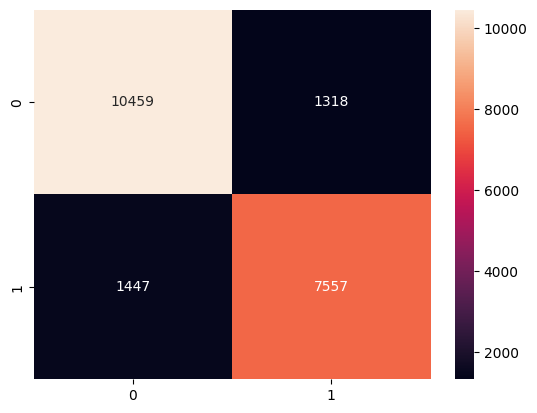

In [146]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'LogisticRegression score on test set: {logit_reg.score(X_test, y_test)}')
print(f'LogisticRegression MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _So, We can see that our LogisticRegression model did quite alright, it didn't really underfit and there is no overfitting as the score on the test set is quite close to the ones gotten from our cross_val_score step. But I think there is still room for improvement._

In [147]:
random_forestclf = RandomForestClassifier()
random_forestclf.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
# model performaance
scores_randomforest = cross_val_score(random_forestclf, X, y, cv=5)

In [149]:
y_test_pred = random_forestclf.predict(X_test)
print(f'CV scores for RandomForestClassifier: {scores_randomforest}')
print(f'CV accuracy for RandomForestClassifier: {np.mean(scores_randomforest)} +/- {np.std(scores_randomforest)}')

CV scores for RandomForestClassifier: [0.96111833 0.96126269 0.95938598 0.96256196 0.96347449]
CV accuracy for RandomForestClassifier: 0.9615606898079468 +/- 0.00139133327190085


LogisticRegression score on test set: 0.9599153072518166
LogisticRegression MSE on test set: 0.04008469274818344


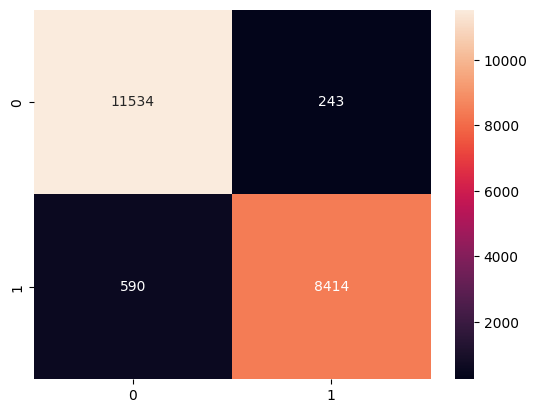

In [150]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'LogisticRegression score on test set: {random_forestclf.score(X_test, y_test)}')
print(f'LogisticRegression MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _Wow, the scores are unbelievable. I think we should just go home because we have a whooping 95+ accuraccy which is far better than logistic regression. The model doesn't underfit the data because both the scores on the training and test set are high and there is no overfitting because the score on the test set is also very similar to the ones gotten from the cross_val_score_

## _Time for the in depth stuffs - EDA, feature everything 🤣🤣_

##### _So if you checked the data description, you'd see a part where they said 0 means non applicalbe lemme just start from there. I want to see if the feature didn't apply to those passengers or they didn't just rate that particular feature_

In [151]:
(ordinal_features == 0).sum()

Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
dtype: int64

In [152]:
pd.set_option('display.max_columns', None)

In [153]:
# I want to see why if 
not_applicable = train_df.loc[(ordinal_features == 0).any(axis=1), :]
not_applicable

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,1,5,1,1,4,5,5,3,5,1,54,44.0,satisfied
42,Male,Loyal Customer,41,Business travel,Business,296,0,0,0,3,2,5,3,4,4,4,4,4,4,3,0,0.0,satisfied
56,Female,Loyal Customer,57,Business travel,Business,2496,0,0,0,1,3,4,5,5,5,5,5,4,5,5,0,5.0,satisfied
78,Female,disloyal Customer,50,Business travel,Eco,216,4,0,4,4,4,4,4,4,5,2,1,4,4,4,0,0.0,neutral or dissatisfied
83,Female,disloyal Customer,21,Business travel,Business,861,4,0,4,4,1,4,1,1,3,4,4,4,5,1,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103814,Male,Loyal Customer,64,Personal Travel,Eco,187,2,4,0,2,3,0,2,3,4,5,5,4,5,3,0,0.0,neutral or dissatisfied
103826,Female,disloyal Customer,25,Business travel,Business,2153,2,0,3,3,3,3,3,3,4,3,4,5,5,3,0,0.0,neutral or dissatisfied
103828,Female,disloyal Customer,21,Business travel,Eco,200,5,0,5,1,5,5,5,5,4,2,1,3,5,5,0,0.0,satisfied
103848,Female,disloyal Customer,26,Business travel,Eco,391,1,0,1,4,3,1,4,3,3,4,3,4,4,3,0,0.0,neutral or dissatisfied


In [154]:
not_applicable.sample(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
28038,Female,Loyal Customer,38,Personal Travel,Eco Plus,888,0,1,0,3,5,0,5,5,3,5,3,3,2,5,0,0.0,satisfied


#### _So, I was just checking online or asking chatgpt about airline classes and it turns out some classes enjoy some beefits that others don't really enjoy o have. So that might be a reason why we have non applicable values in our dataset._

In [155]:
business_not_applicalble = not_applicable.loc[not_applicable['Class'] == 'Business']
print((business_not_applicalble == 0).all())
business_not_applicalble

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
42,Male,Loyal Customer,41,Business travel,Business,296,0,0,0,3,2,5,3,4,4,4,4,4,4,3,0,0.0,satisfied
56,Female,Loyal Customer,57,Business travel,Business,2496,0,0,0,1,3,4,5,5,5,5,5,4,5,5,0,5.0,satisfied
83,Female,disloyal Customer,21,Business travel,Business,861,4,0,4,4,1,4,1,1,3,4,4,4,5,1,0,0.0,satisfied
104,Male,disloyal Customer,22,Business travel,Business,231,5,0,5,4,5,5,5,5,3,4,4,3,1,5,0,0.0,satisfied
148,Female,Loyal Customer,55,Business travel,Business,3634,0,4,0,4,4,5,5,4,4,1,1,4,4,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103633,Male,Loyal Customer,36,Business travel,Business,2799,0,0,0,2,4,4,5,2,2,2,2,3,2,4,17,10.0,satisfied
103728,Female,Loyal Customer,49,Business travel,Business,3578,0,0,0,3,2,1,3,5,5,5,5,4,5,3,65,95.0,satisfied
103745,Female,disloyal Customer,25,Business travel,Business,472,5,0,4,3,2,4,2,2,5,5,4,5,4,2,0,0.0,satisfied
103795,Female,disloyal Customer,22,Business travel,Business,235,5,0,5,4,3,5,5,3,5,4,4,3,5,3,0,0.0,satisfied


#### _So, from here, we see that there is not a feature where everybody here is lacking a particular feature_

In [156]:
eco_plus_not_applicalble = not_applicable.loc[not_applicable['Class'] == 'Eco Plus', :]
print((eco_plus_not_applicalble == 0).all())
eco_plus_not_applicalble

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
576,Female,Loyal Customer,64,Personal Travel,Eco Plus,213,2,0,2,1,5,5,5,5,5,2,5,5,5,5,0,6.0,neutral or dissatisfied
649,Male,Loyal Customer,62,Personal Travel,Eco Plus,483,2,0,2,4,1,2,5,1,5,4,5,3,5,1,12,25.0,neutral or dissatisfied
766,Male,Loyal Customer,37,Personal Travel,Eco Plus,223,3,5,0,2,4,0,4,4,3,5,5,3,5,4,0,0.0,neutral or dissatisfied
1298,Female,disloyal Customer,17,Business travel,Eco Plus,258,1,0,1,4,4,1,4,4,2,2,4,4,4,4,0,0.0,neutral or dissatisfied
1524,Female,disloyal Customer,23,Business travel,Eco Plus,764,2,0,2,4,2,2,2,2,4,3,5,1,1,2,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103129,Female,disloyal Customer,28,Business travel,Eco Plus,1024,0,0,0,3,3,0,3,3,2,4,3,5,4,3,30,24.0,satisfied
103436,Female,Loyal Customer,56,Personal Travel,Eco Plus,187,2,4,0,5,0,3,2,4,5,5,4,2,3,2,142,152.0,neutral or dissatisfied
103536,Female,disloyal Customer,25,Business travel,Eco Plus,357,4,0,4,3,4,4,4,4,5,4,3,1,5,4,1,0.0,neutral or dissatisfied
103604,Male,Loyal Customer,24,Business travel,Eco Plus,1504,0,3,0,4,5,0,5,5,2,2,1,5,5,5,76,71.0,satisfied


#### _We also see here that there is not a single feature in Eco plus class that everyone is lacking_

In [157]:
eco_not_applicalble = not_applicable.loc[not_applicable['Class'] == 'Eco', :]
print((eco_not_applicalble == 0).all())
eco_not_applicalble

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,1,5,1,1,4,5,5,3,5,1,54,44.0,satisfied
78,Female,disloyal Customer,50,Business travel,Eco,216,4,0,4,4,4,4,4,4,5,2,1,4,4,4,0,0.0,neutral or dissatisfied
90,Male,Loyal Customer,60,Personal Travel,Eco,931,0,5,0,3,4,0,3,4,4,5,5,4,5,4,0,0.0,satisfied
108,Female,disloyal Customer,26,Business travel,Eco,488,2,0,2,4,1,2,1,1,3,2,5,1,3,1,0,0.0,neutral or dissatisfied
120,Male,disloyal Customer,26,Business travel,Eco,416,3,0,3,3,1,3,1,1,3,5,2,3,3,1,0,9.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103742,Female,disloyal Customer,22,Business travel,Eco,552,4,0,4,1,1,4,1,1,5,3,4,3,5,1,0,69.0,neutral or dissatisfied
103814,Male,Loyal Customer,64,Personal Travel,Eco,187,2,4,0,2,3,0,2,3,4,5,5,4,5,3,0,0.0,neutral or dissatisfied
103828,Female,disloyal Customer,21,Business travel,Eco,200,5,0,5,1,5,5,5,5,4,2,1,3,5,5,0,0.0,satisfied
103848,Female,disloyal Customer,26,Business travel,Eco,391,1,0,1,4,3,1,4,3,3,4,3,4,4,3,0,0.0,neutral or dissatisfied


- #### _This is also false showing that everyboy had access to every feature_
- #### _But maybe people in different classes had like different level of it e.g maybe eco had a very small leg room, eco plus had a slightly bigger leg room and business had the biggest leg room. Sha everybody had access to the same features._
- #### _So, a couple of factors could be responsible for the 0 values we have in our dataset. For instance maybe the person didn't use the wifi service or the person didn't understand what they meant, or the passenger didn't know how to answer a question so the person just skipped it or other factors that I don't think I'd be exploring in this notebook._
- #### _So I'm going to change them to NaN_

In [158]:
ordinal_features = ordinal_features.replace(0, np.nan)

In [159]:
train_df.loc[:, ordinal_features.columns] = ordinal_features

In [160]:
train_df.isnull().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes              310
satisfaction                            0
dtype: int64

#### _So, I'm either going to have to impute this missing values somehow or just drop them later._

In [161]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,0,0.0,neutral or dissatisfied


In [162]:
ordinal_features

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0
1,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0
2,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0
3,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0
4,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0
103900,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0
103901,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0
103902,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0


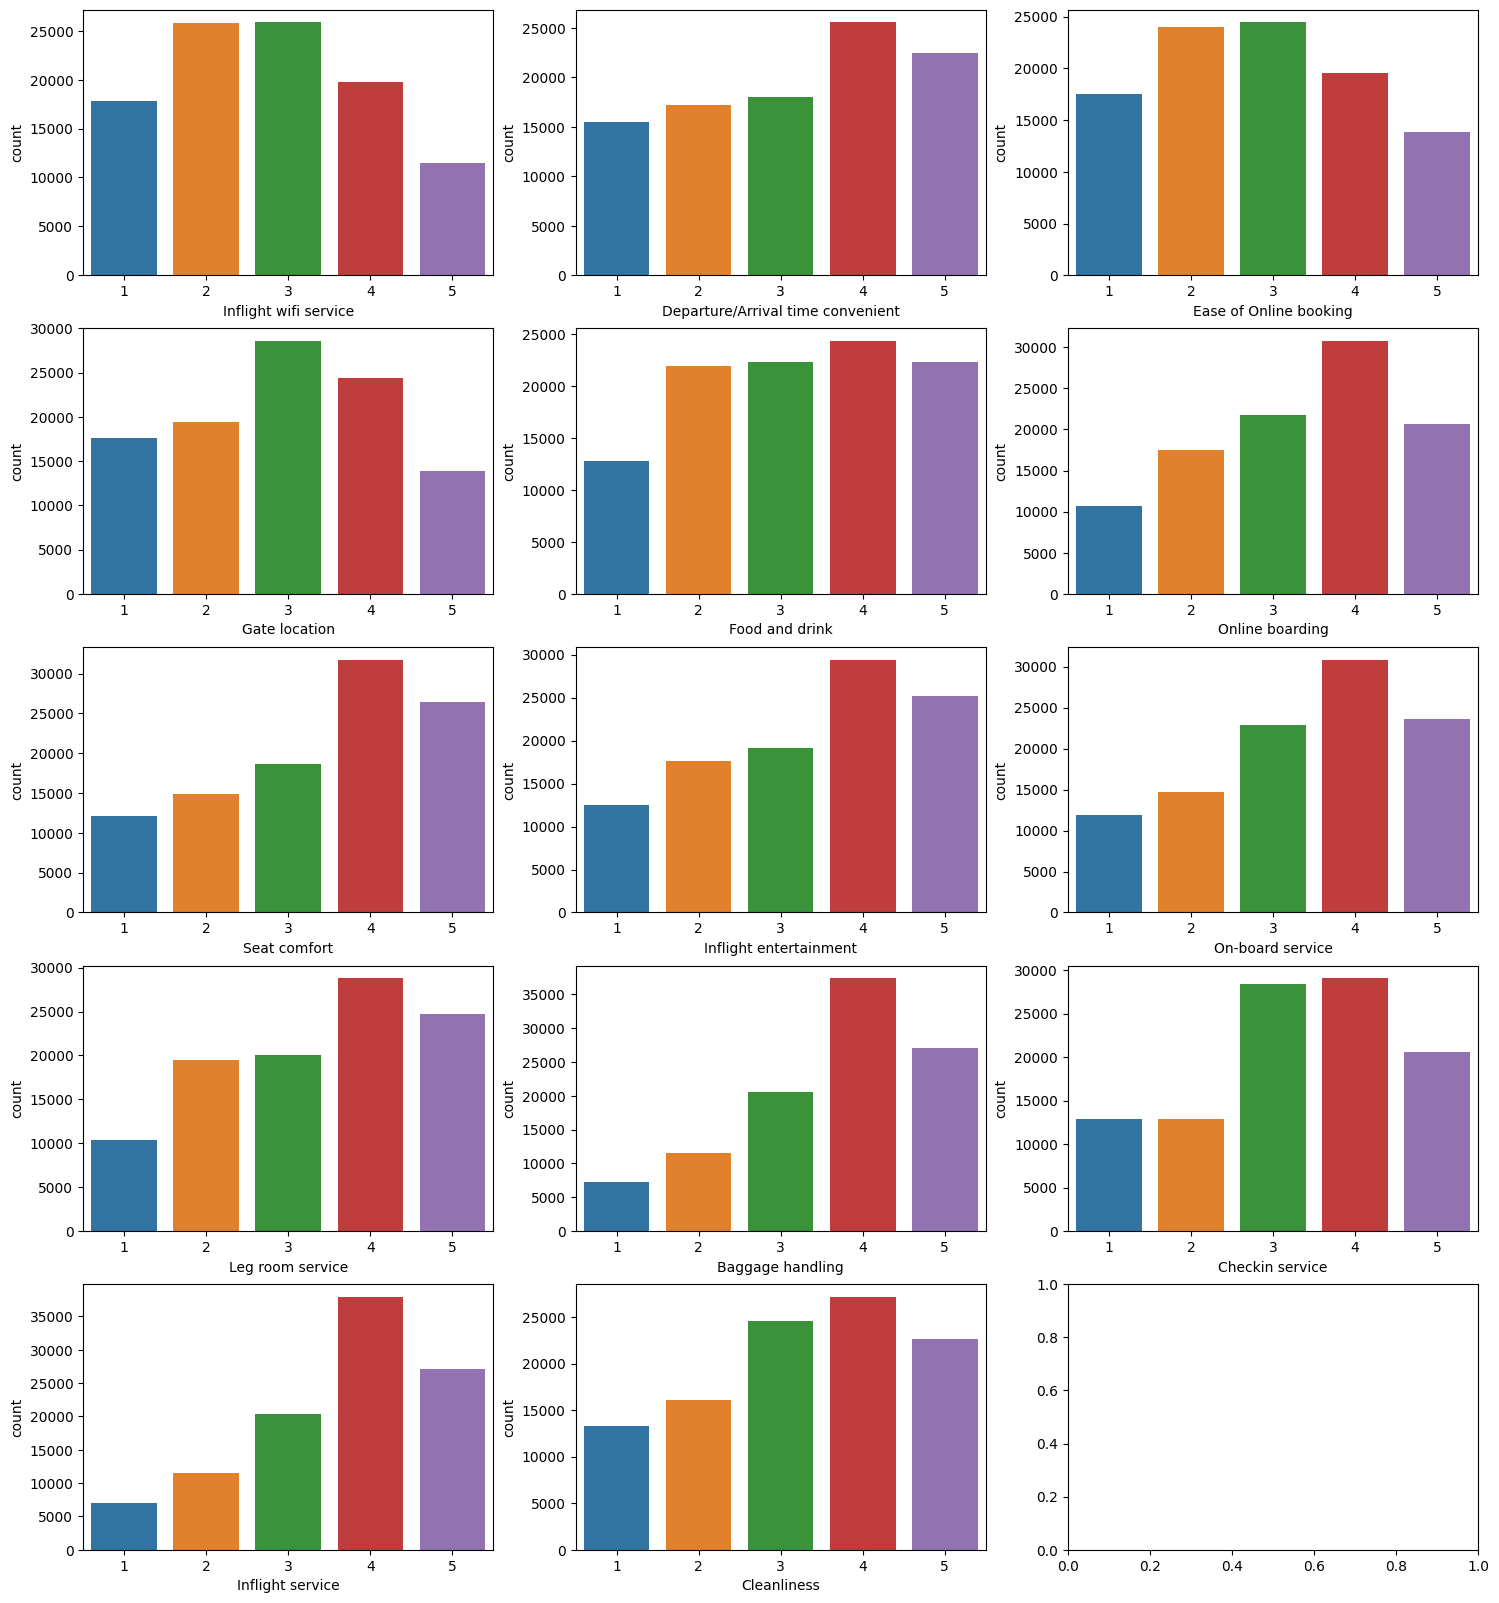

In [163]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
ax = ax.flatten()

for i, columns in enumerate(ordinal_features):
    sns.countplot(x=columns, data=train_df, ax=ax[i], order=[1, 2, 3, 4, 5])

In [164]:
nominal_features

,Gender,satisfaction,Type of Travel,Customer Type,Class
0,Male,neutral or dissatisfied,Personal Travel,Loyal Customer,Eco Plus
1,Male,neutral or dissatisfied,Business travel,disloyal Customer,Business
2,Female,satisfied,Business travel,Loyal Customer,Business
3,Female,neutral or dissatisfied,Business travel,Loyal Customer,Business
4,Male,satisfied,Business travel,Loyal Customer,Business
...,...,...,...,...,...
103899,Female,neutral or dissatisfied,Business travel,disloyal Customer,Eco
103900,Male,satisfied,Business travel,Loyal Customer,Business
103901,Male,neutral or dissatisfied,Business travel,disloyal Customer,Business
103902,Female,neutral or dissatisfied,Business travel,disloyal Customer,Eco


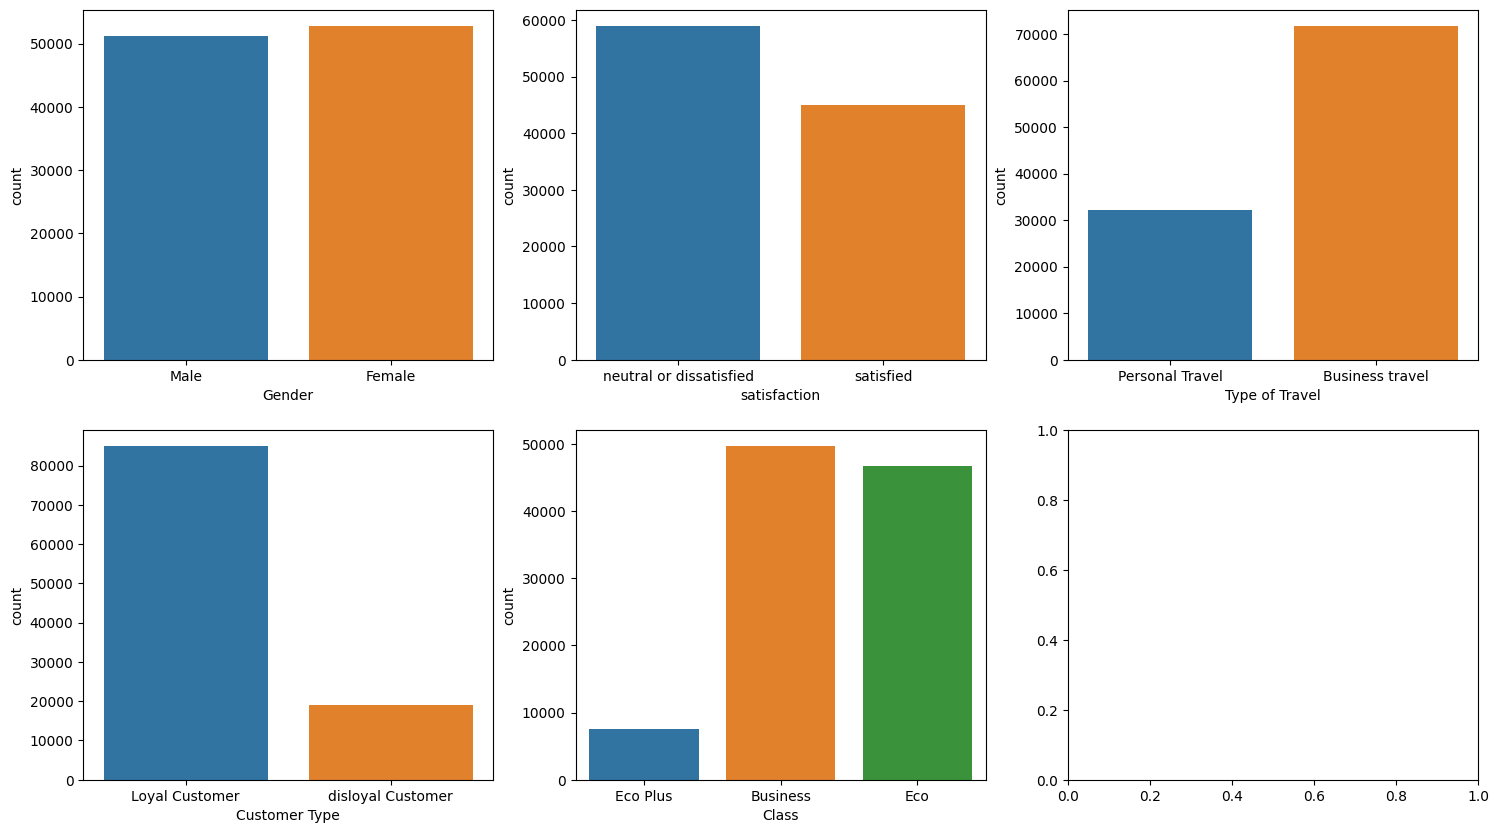

In [165]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
ax = ax.flatten()

for i, columns in enumerate(nominal_features):
    sns.countplot(x=columns, data=train_df, ax=ax[i])

In [166]:
continous_features

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
103899,23,192,3,0.0
103900,49,2347,0,0.0
103901,30,1995,7,14.0
103902,22,1000,0,0.0


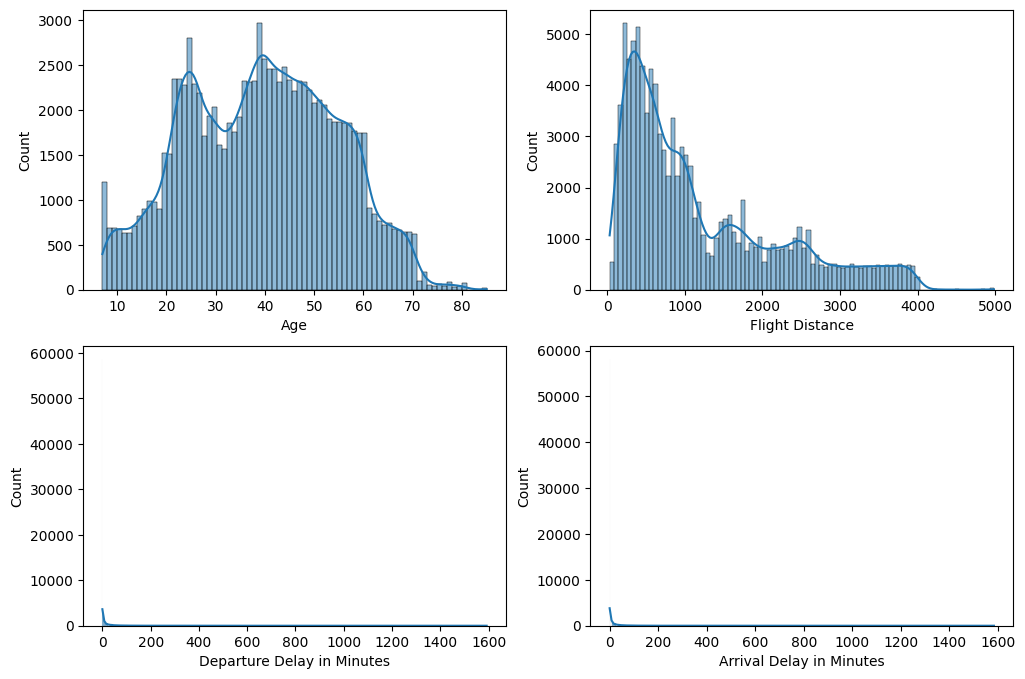

In [167]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, columns in enumerate(continous_features):
    sns.histplot(x=columns, data=train_df, ax=ax[i], kde=True)

## _QUESTIONS OR ASSUMPTIONS TO ANSWER FROM THIS EDA:_
- #### _loyal customers are most likely to be satisfied most of the times because they are loyal -\_-._
- #### _People in the business class are going to be more satisfied than people in other classes. Since Business class is like the best class there_
- #### _People travelling for business purposes are most likely taking the businesss class. Like Bruhhhhh_
- #### _The more delayed people are, the less likely they are to be satisfied_
- #### _Only Gen Z care about the services in the plane and so any mess up in services, they are most likely to be less satisfied._
- #### _People who are travelling for personal purposes are most likely going to be dissatisfied because they are most likely travelling to go and flex and the plane should not ruin that mood_
- #### _People who are travelling long distances would most likely be not satisfied if the services onboard are wack due to the length of the journey. The opposite applies to those on shorter journies_

In [168]:
train_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [169]:
train_df['satisfaction'] = train_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [170]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,0,0.0,0


<AxesSubplot:xlabel='Customer Type', ylabel='satisfaction'>

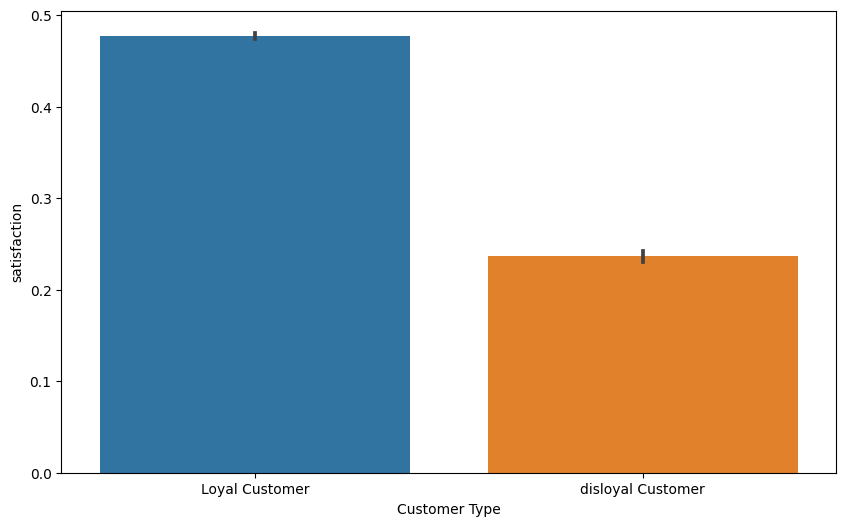

In [171]:
# loyal customers are most likely to be satisfied most of the times because they are loyal.
plt.figure(figsize=(10, 6))
sns.barplot(y='satisfaction', x='Customer Type', data=train_df)

#### _So we've invalidated that hypothesis as we can see that only about 48% of customers were satisfied but it is even lower for disloyal custoemrs. So, we didn't really invalidate that hypothesis as we can see that loyal customers are more satisfied than disloyal customers even though the amount of loyal customers that were satisfied is quite low._

<AxesSubplot:xlabel='Class', ylabel='satisfaction'>

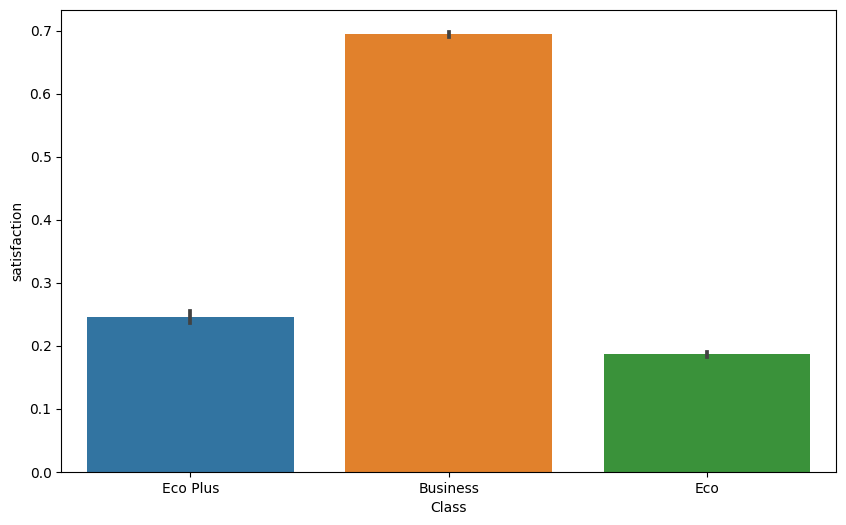

In [172]:
# People in the business class are going to be more satisfied than people in other classes. Since Business class is like the best class there
plt.figure(figsize=(10, 6))
sns.barplot(y='satisfaction', x='Class', data=train_df)

#### _Well so we have validated that hypothesis as we can see that business class has a larger percentage of satisfied customers compared to other classes. Business class satisfied % is about 67% Eco is the lowest with less than 20% then Eco Plus with a little over 20%. From this, I am guessing Eco plus is a better class than Eco. Eco plus, Its in the name. 🤣🤣_

<AxesSubplot:xlabel='Class', ylabel='count'>

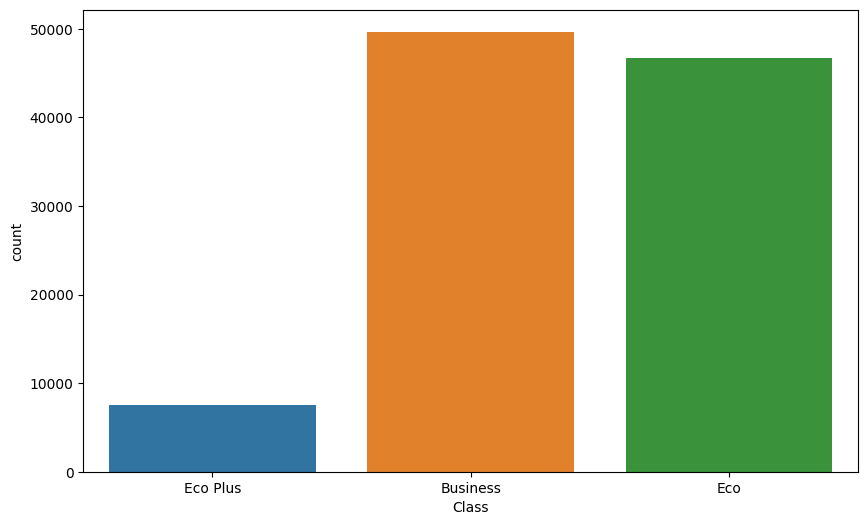

In [173]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=train_df)

#### _It turns out that most people would rather go with the toppest notch available or the lowest notch available. Maybe because like middle tier is not worth the additional money from Eco to Eco plus and it is not worth the reduction from Business to Eco plus_

<AxesSubplot:>

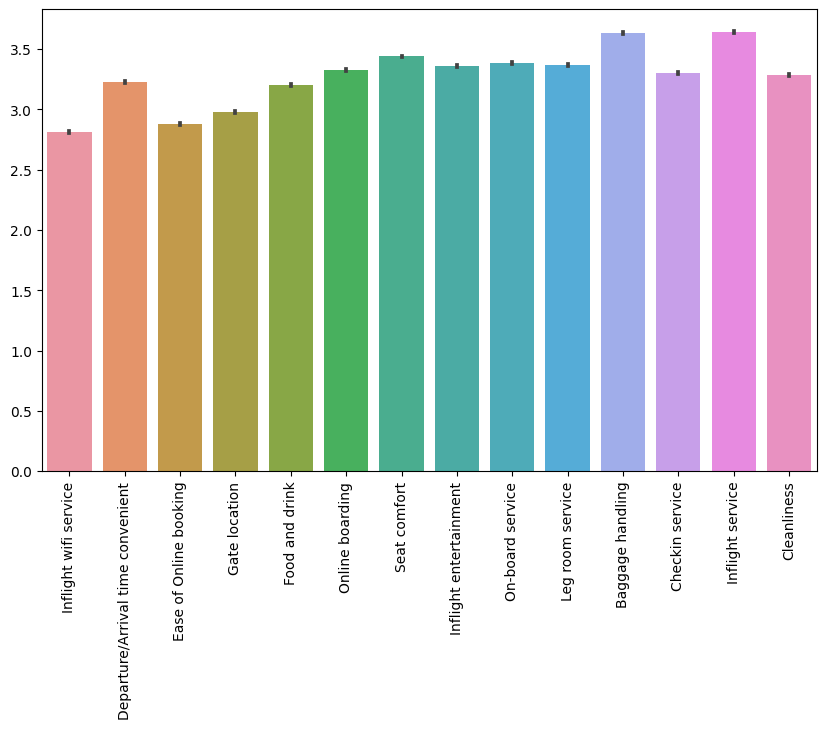

In [174]:
# i'm just going to check the ratings of different services across each of these classes here.
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(ordinal_features)

In [175]:
ordinal_features.describe().T['mean']

Inflight wifi service                2.813712
Departure/Arrival time convenient    3.224788
Ease of Online booking               2.881328
Gate location                        2.976911
Food and drink                       3.205430
Online boarding                      3.328147
Seat comfort                         3.439429
Inflight entertainment               3.358610
On-board service                     3.382460
Leg room service                     3.366347
Baggage handling                     3.631833
Checkin service                      3.304322
Inflight service                     3.640533
Cleanliness                          3.286730
Name: mean, dtype: float64

In [176]:
# i'm just going to check the ratings of different services across each of these classes here.
classes_ratings_idk_a_good_name = train_df.groupby('Class').mean()[ordinal_features.columns]
classes_ratings_idk_a_good_name


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.890492,3.045218,3.042104,2.982986,3.325241,3.757394,3.760933,3.635877,3.679695,3.653694,3.842907,3.519249,3.844811,3.477880
Eco,2.729309,3.402339,2.724856,2.971954,3.090045,2.913908,3.138838,3.098455,3.120355,3.106120,3.450551,3.122002,3.463921,3.108297
Eco Plus,2.841896,3.322127,2.789680,2.967574,3.130569,2.996817,3.183747,3.143811,3.047638,3.077811,3.363758,3.017214,3.388444,3.132862


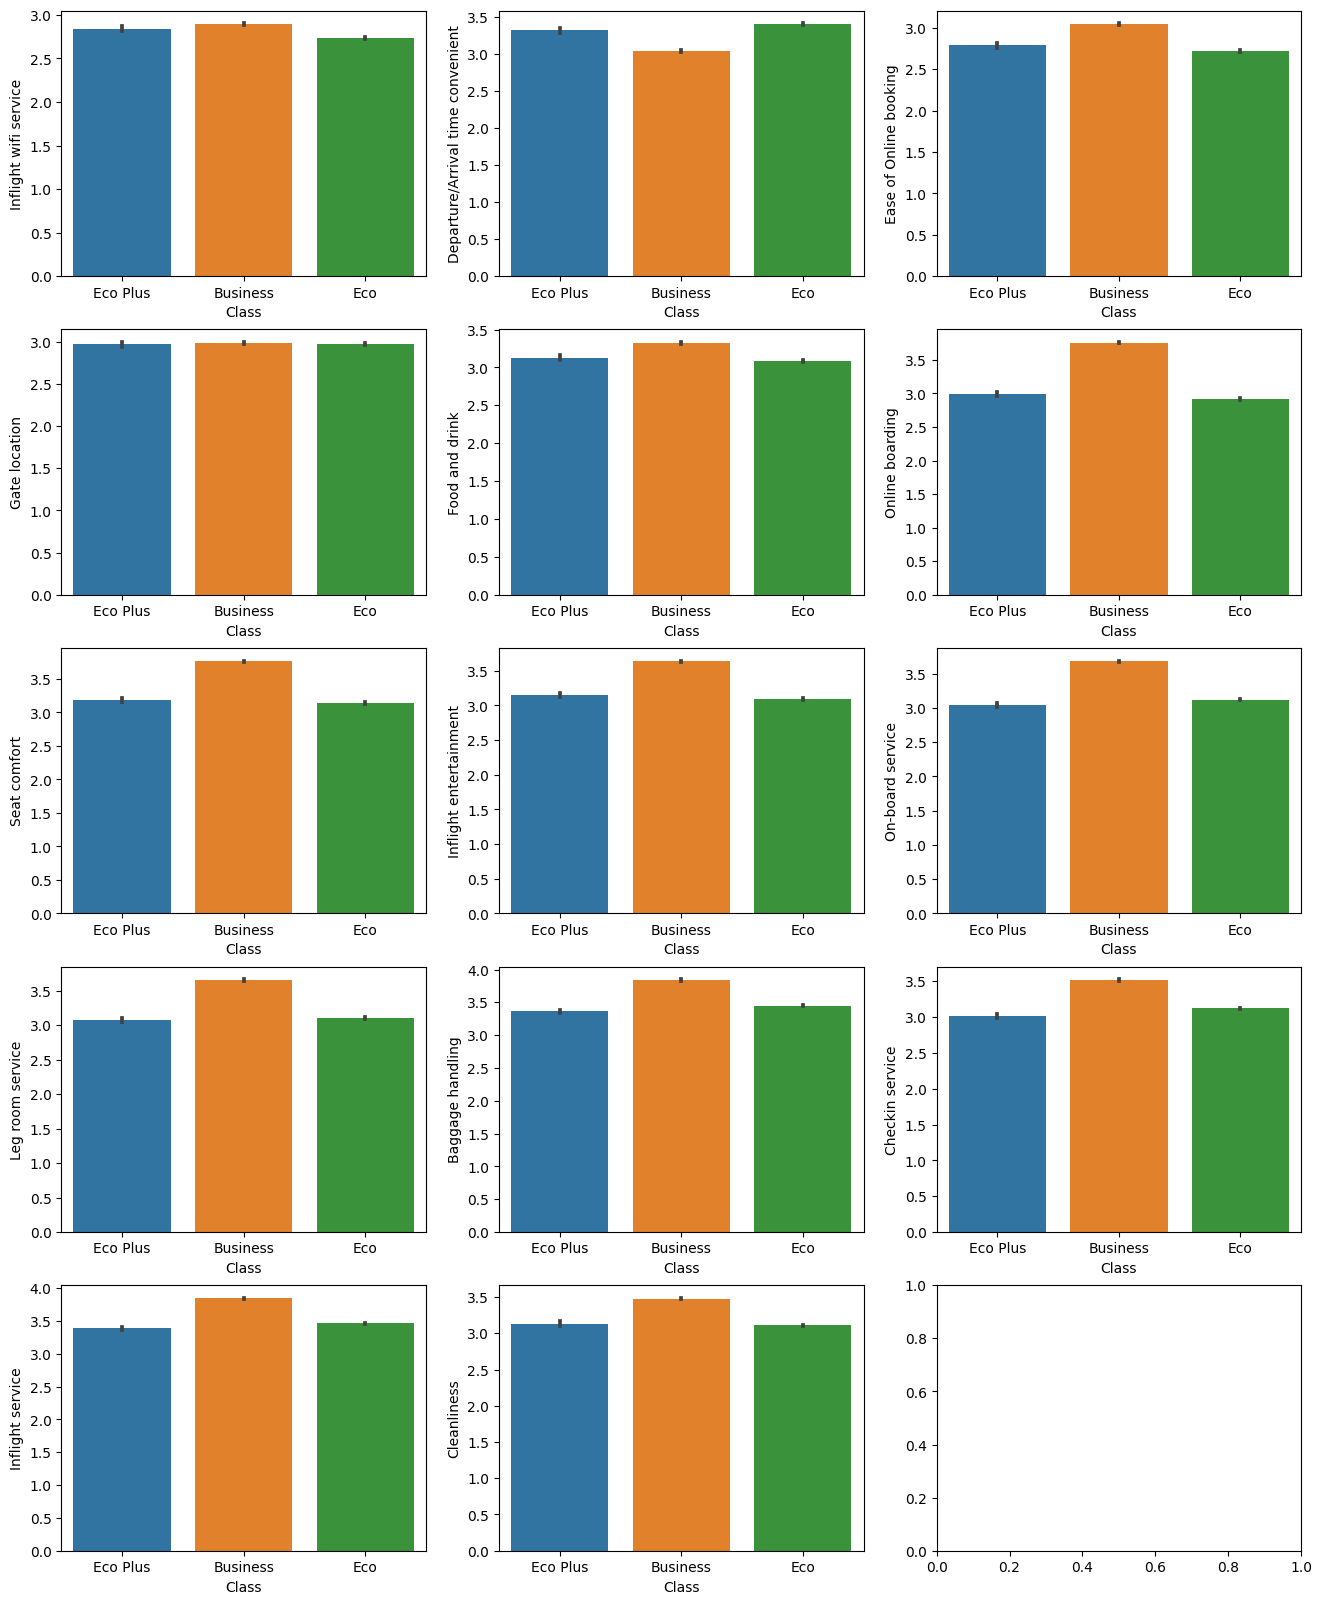

In [177]:
# i'm just going to check the ratings of different services across each of these classes here.
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
ax = ax.flatten()

for i, column in enumerate(ordinal_features):
    sns.barplot(x='Class', y=column, data=train_df, ax=ax[i])

#### _So Business class actually had the highest average ratings in most of the categories except for Departure/Arrival time convenient and Gate. For the Departure/Arrival time convenient, I assume since the most people in business class are going for traveling for business purposes, they wouldnt tolerate any form of lateness. And for the Gate all of them kinda had the same average rating. While fo Eco Plus and Eco, something unusual is happening. Like you'd expect Eco Plus to beat Eco in everything or in most things but this is not the case for Departure/Arrival time convenient, Ease of Online Booking, On board Service, Leg room Service, Baggage Handling, Checking Service, Inflight Service. Some of them weren't shocking to me but some that came as a schock were on-board service, leg room service, baggage handling, checking service, inflight service, and cleanliness. Maybe its because the people in Eco Plus set their expectations to high and they were disappointed by the services and maybe the people in Eco set their expectations not too high and were amazed by the service who knows?_

Quesiton: How bad did people travellig for business purposes react to lateness

#### _Assumption 3: People travelling for business purposes are most likely taking the businesss class Like Bruhhhhh. Put in another way, the most people travelling in business class are traveling for business purposes._

In [178]:
group_number, total_number = train_df.groupby('Class')['Type of Travel'].value_counts(), train_df.groupby('Class')['Type of Travel'].count()
percentage = group_number / total_number
percentage

Class     Type of Travel 
Business  Business travel    0.956569
          Personal Travel    0.043431
Eco       Personal Travel    0.566649
          Business travel    0.433351
Eco Plus  Business travel    0.519082
          Personal Travel    0.480918
Name: Type of Travel, dtype: float64

In [179]:
group_number.reset_index(name='group_number')

,Class,Type of Travel,group_number
0,Business,Business travel,47508
1,Business,Personal Travel,2157
2,Eco,Personal Travel,26488
3,Eco,Business travel,20257
4,Eco Plus,Business travel,3890
5,Eco Plus,Personal Travel,3604


In [180]:
total_number.reset_index()

,Class,Type of Travel
0,Business,49665
1,Eco,46745
2,Eco Plus,7494


In [181]:
percentage = percentage.reset_index(name='percentage')
percentage

,Class,Type of Travel,percentage
0,Business,Business travel,0.956569
1,Business,Personal Travel,0.043431
2,Eco,Personal Travel,0.566649
3,Eco,Business travel,0.433351
4,Eco Plus,Business travel,0.519082
5,Eco Plus,Personal Travel,0.480918


<AxesSubplot:xlabel='Class', ylabel='percentage'>

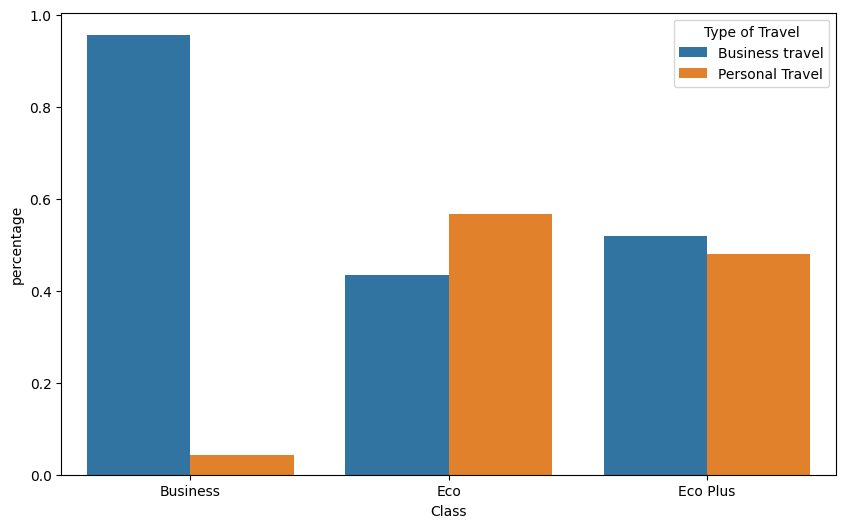

In [182]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Type of Travel', y='percentage', x='Class', data=percentage)

#### _So we've validated our hypothesis, most of the people traelling in business class are travelling for business purposes._

In [183]:
group_number, total_number = train_df.groupby('Type of Travel')['Class'].value_counts(), train_df.groupby('Type of Travel')['Class'].count()
percentage = group_number / total_number
percentage = percentage.reset_index(name='percentage')
percentage

,Type of Travel,Class,percentage
0,Business travel,Business,0.663010
1,Business travel,Eco,0.282702
2,Business travel,Eco Plus,0.054288
3,Personal Travel,Eco,0.821359
4,Personal Travel,Eco Plus,0.111755
5,Personal Travel,Business,0.066886


<AxesSubplot:xlabel='Type of Travel', ylabel='percentage'>

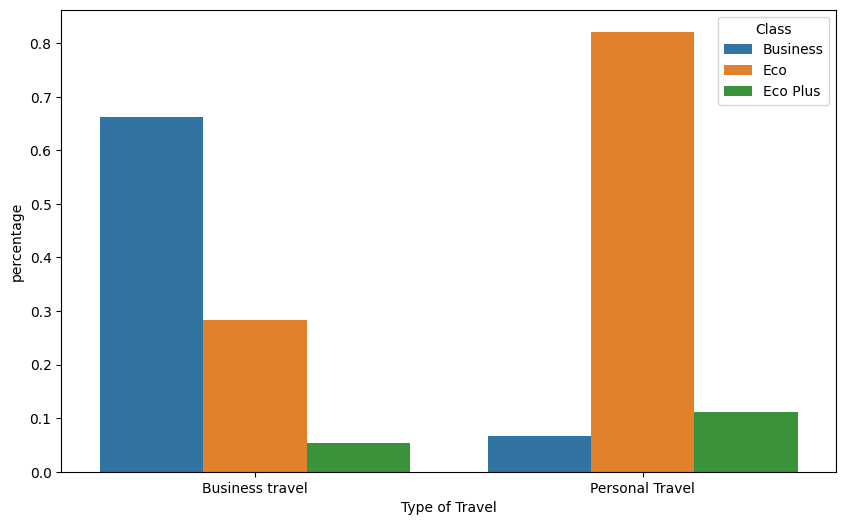

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Travel', y='percentage', hue='Class', data=percentage)

#### _We can see that most of the people travelling for business purposes are taking the business class. And we see that a large number of people travelling for personal purposes are flyng in the Eco class_

#### _Assumption 4: The more delayed people are, the less likely they are to be satisfied. I also know from the discussions that arrival delay and departure delay are going to be highly correlated because late to bed or should I say bed, late to rise 🤣🤣_

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

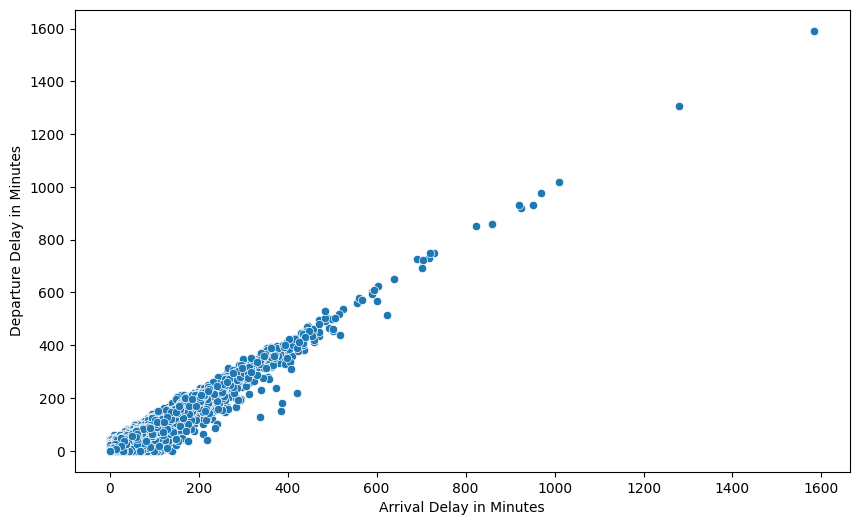

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arrival Delay in Minutes', y='Departure Delay in Minutes', data=train_df)

##### _Yep they are actually very correlated._

In [186]:
train_df['Total Delay in Minutes'] = train_df['Arrival Delay in Minutes'] + train_df['Departure Delay in Minutes']

C:\Users\Owner\AppData\Local\Temp\ipykernel_22220\3577922895.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=series, ax=ax1)


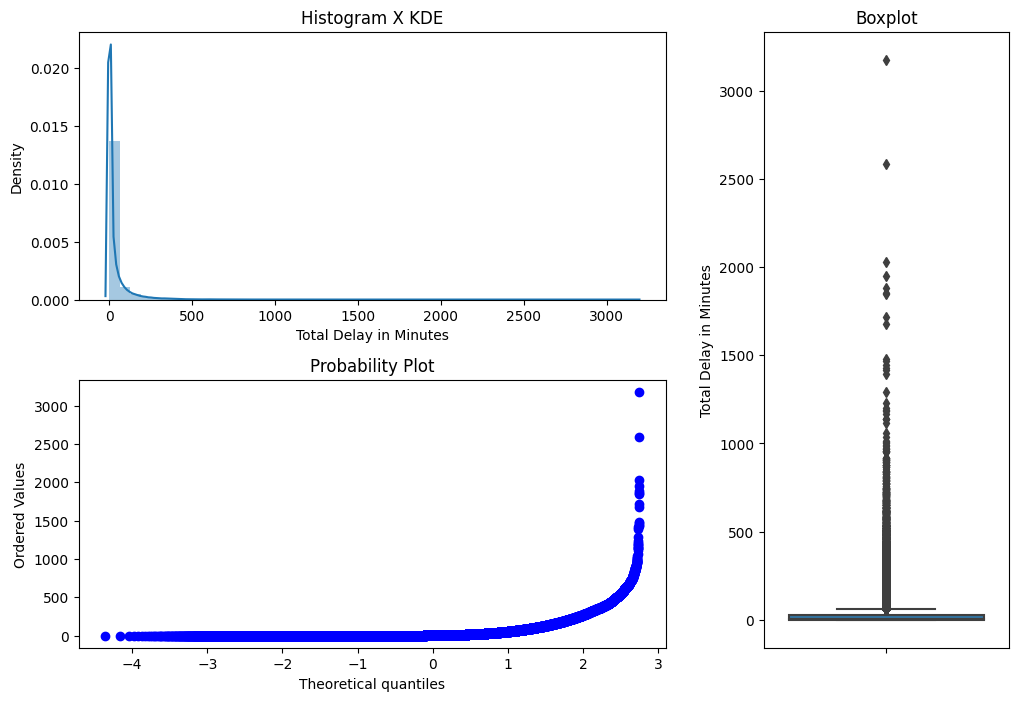

In [187]:
three_charts(train_df['Total Delay in Minutes'])

<AxesSubplot:xlabel='Total Delay in Minutes', ylabel='Density'>

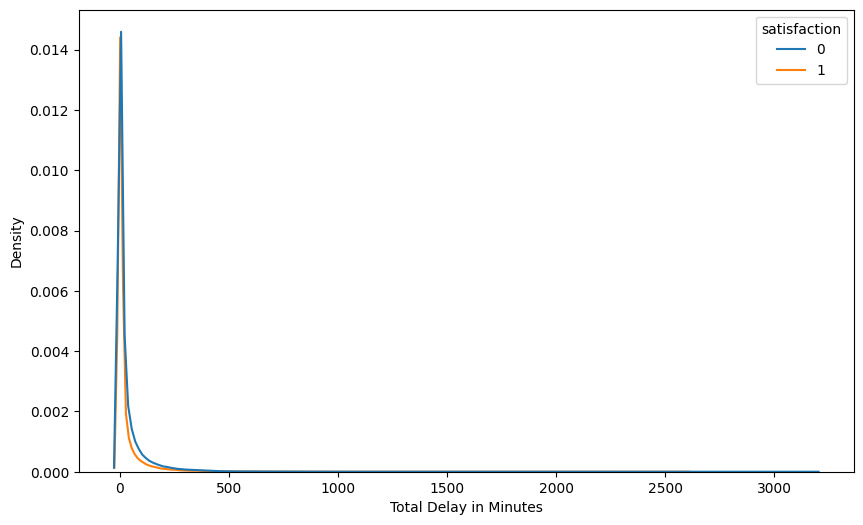

In [188]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Total Delay in Minutes', data=train_df, hue='satisfaction')

<AxesSubplot:xlabel='satisfaction', ylabel='Total Delay in Minutes'>

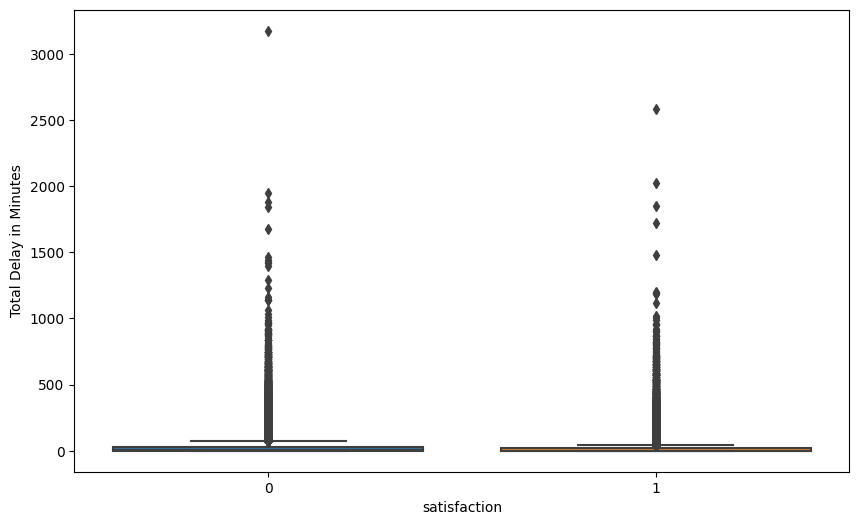

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total Delay in Minutes', x='satisfaction', data=train_df)

#### _So we can't see anything much from these_

satisfaction
0    33.559449
1    25.177161
Name: Total Delay in Minutes, dtype: float64


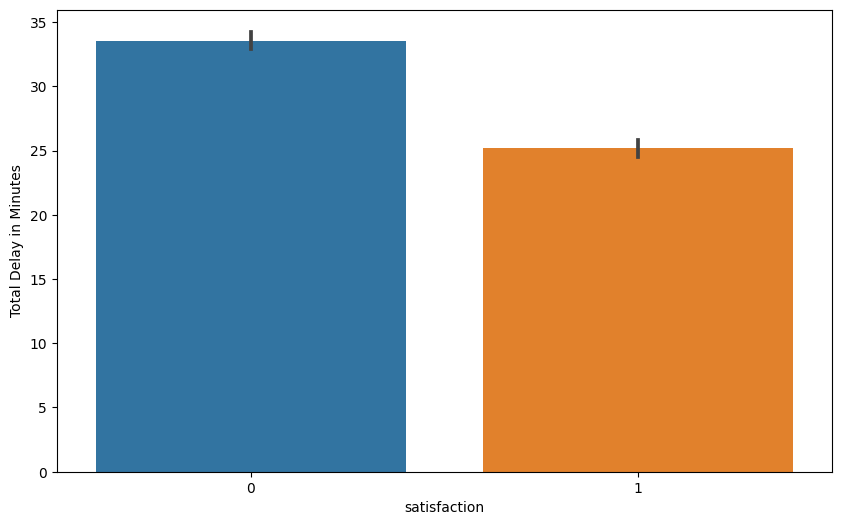

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x='satisfaction', y='Total Delay in Minutes', data=train_df)
print(train_df.groupby('satisfaction')['Total Delay in Minutes'].mean())

#### _This has validated our hypothesis and we can see that the average delay time for unsatisfied people is actually higher than satisfied customers._

#### _Assumption 5: Only Gen Z care about the services in the plane and so any mess up in services, they are most likely to be less satisfied._

C:\Users\Owner\AppData\Local\Temp\ipykernel_22220\3577922895.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=series, ax=ax1)


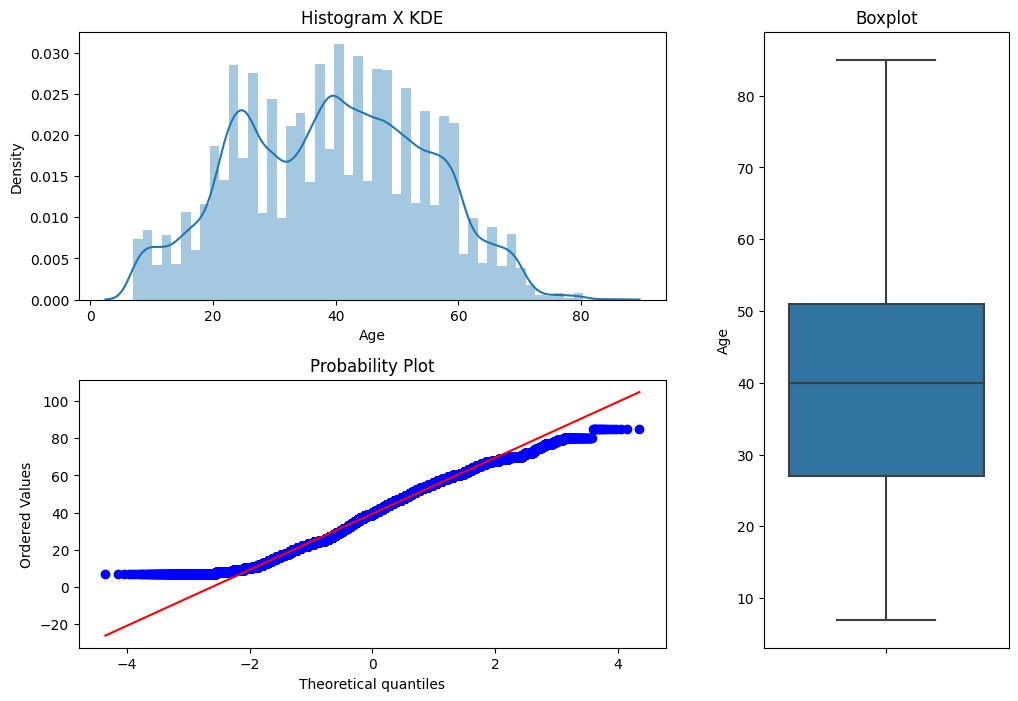

In [191]:
three_charts(train_df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

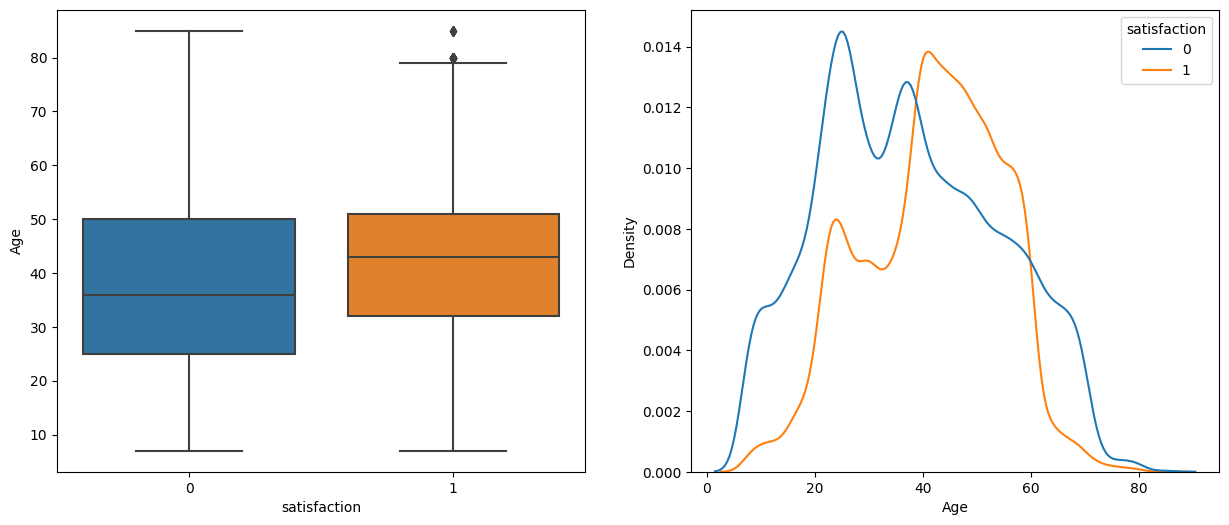

In [192]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='Age', data=train_df)
plt.subplot(1, 2, 2)
sns.kdeplot(hue='satisfaction', x='Age', data=train_df)

#### _I haven't really learnt how to interprete box plots but the kdeplot on the other hand validates the hypothesis that younger people or Gen Z are the most dissatisfied because you know "your generation likes comfort too much."._

#### _Assumption 6: People who are travelling for personal purposes are most likely going to be dissatisfied because they are most likely travelling to go and flex and the plane should not ruin that mood_

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction'>

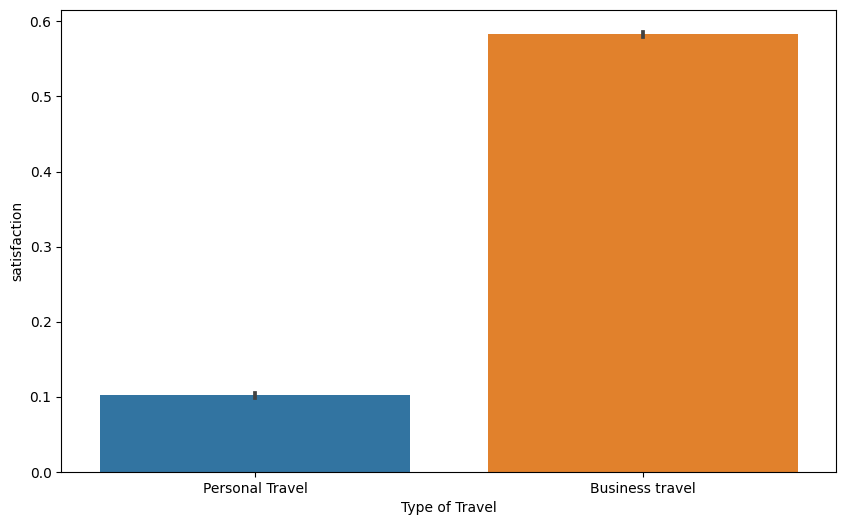

In [193]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Travel', y='satisfaction', data=train_df)

#### _Well I guess I was right. Only about 10% of people travelling for personal purposes were satisfied compared to about 58% of people who were travelling for business purposes._

#### _Assumptions 7: People who are travelling long distances would most likely be not satisfied if the services onboard are wack due to the length of the journey. The opposite applies to those on shorter journies_

C:\Users\Owner\AppData\Local\Temp\ipykernel_22220\3577922895.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=series, ax=ax1)


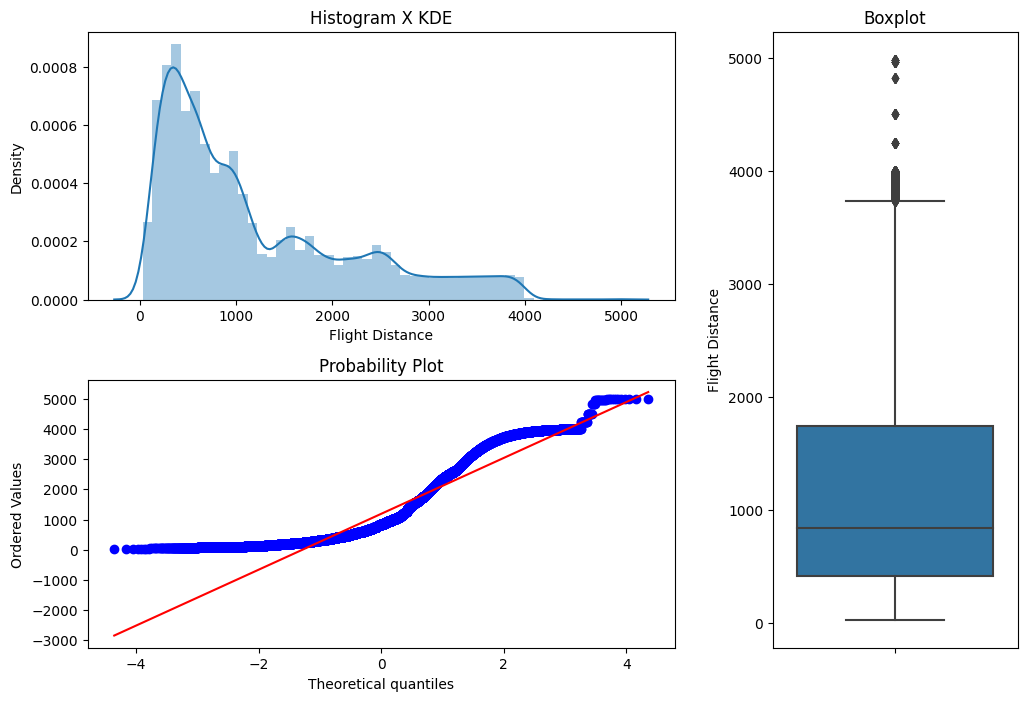

In [194]:
three_charts(train_df['Flight Distance'])

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

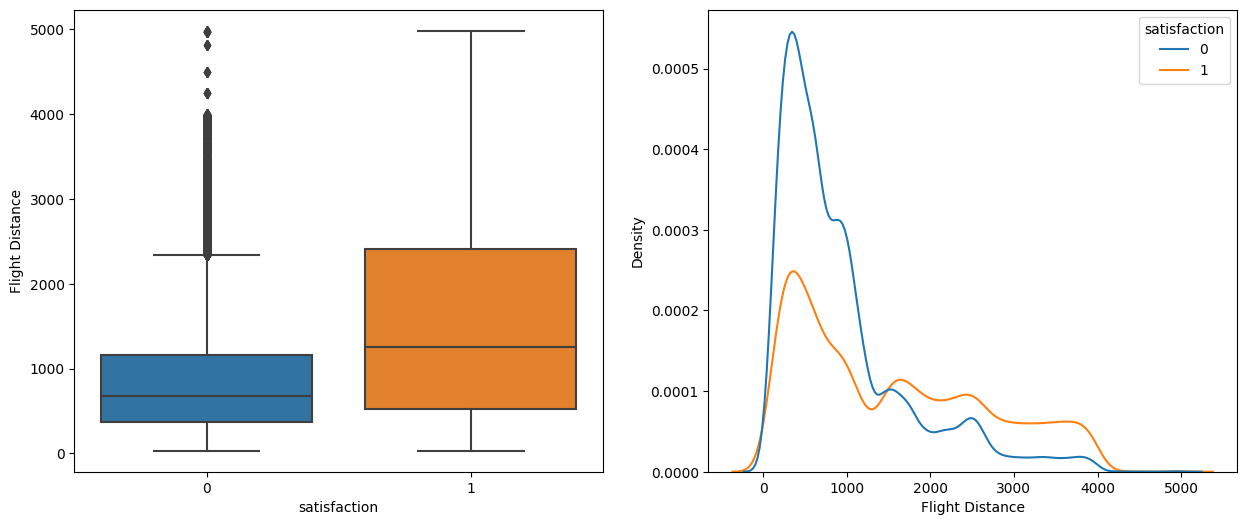

In [195]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='Flight Distance', data=train_df)
plt.subplot(1, 2, 2)
sns.kdeplot(hue='satisfaction', x='Flight Distance', data=train_df)

#### _This invalidates our hypothesis because at relatively short distances, the number of dissatisfied people outweighed the number of satisfied people. And at longer distances, the opposite was the case._

## __CONCLUSION:__
- #### _loyal customers are more satisfied than disloyal customers even though the amount of loyal customers that were satisfied is quite low._
- #### _Business class has a larger percentage of satisfied customers compared to other classes. Business class satisfied % is about 67% Eco is the lowest with less than 20% then Eco Plus with a little over 20%._
- #### _Most people would rather go with the toppest notch available or the lowest notch available. Maybe because like middle tier is not worth the additional money from Eco to Eco plus and it is not worth the reduction from Business to Eco plus_
- #### _So Business class actually had the highest average ratings in most of the categories except for Departure/Arrival time convenient and Gate. Something unusual is happening. Like you'd expect Eco Plus to beat Eco in everything or in most things but this is not the case for. In some of the major things i'd expect Eco plus to be better than Eco in._
- #### _Most of the people travelling in business class are travelling for business purposes._
- #### _Most of the people travelling for business purposes are taking the business class. And we see that a large number of people travelling for personal purposes are flyng in the Eco class_
- #### _The average delay time for unsatisfied people is actually higher than satisfied customers._
- #### _younger people or Gen Z are the most dissatisfied_
- #### _The people travelling on personal purposes were mostly unsatisfied_
- #### _At relatively short distances, the number of dissatisfied people outweighed the number of satisfied people. And at longer distances, the opposite was the case_

In [196]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,0,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,0,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,1,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,0,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,3,0.0,0,3.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,0,0.0,1,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,7,14.0,0,21.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,0,0.0,0,0.0


#### _Time to do some null values data cleaning stuff._

In [197]:
train_df.isna().sum().sort_values(ascending=False)

Departure/Arrival time convenient    5300
Ease of Online booking               4487
Inflight wifi service                3103
Online boarding                      2428
Leg room service                      472
Total Delay in Minutes                310
Arrival Delay in Minutes              310
Food and drink                        107
Inflight entertainment                 14
Cleanliness                            12
Inflight service                        3
On-board service                        3
Checkin service                         1
Seat comfort                            1
Gate location                           1
Customer Type                           0
Baggage handling                        0
Flight Distance                         0
Class                                   0
Type of Travel                          0
Departure Delay in Minutes              0
Age                                     0
satisfaction                            0
Gender                            

#### _So it turns out Arrival Delay in Minutes has some missing values but Departure Delay in Minutes doesn't have any and rememeber, "early to bird, early to rise and late to bird, late to rise. What I'm saying is that the arrival delay in minutes and the departure delay in minutes should be roughly the same. So, for every missing value of Arrival just put in the corresponding Departure_

#### _I feel it is actually safe to fill in the missing arrival values with the corresponding departure delay values_

In [198]:
arrival_null_index = (train_df['Arrival Delay in Minutes'].isnull()[train_df['Arrival Delay in Minutes'].isnull() == True]).index
train_df.loc[arrival_null_index, 'Arrival Delay in Minutes'] = train_df.loc[arrival_null_index, 'Departure Delay in Minutes']

In [199]:
train_df['Difference btw Arrival and Departure'] = train_df['Departure Delay in Minutes'] - train_df['Arrival Delay in Minutes']
train_df['Total Delay in Minutes'] = train_df['Departure Delay in Minutes'] + train_df['Arrival Delay in Minutes']

<AxesSubplot:>

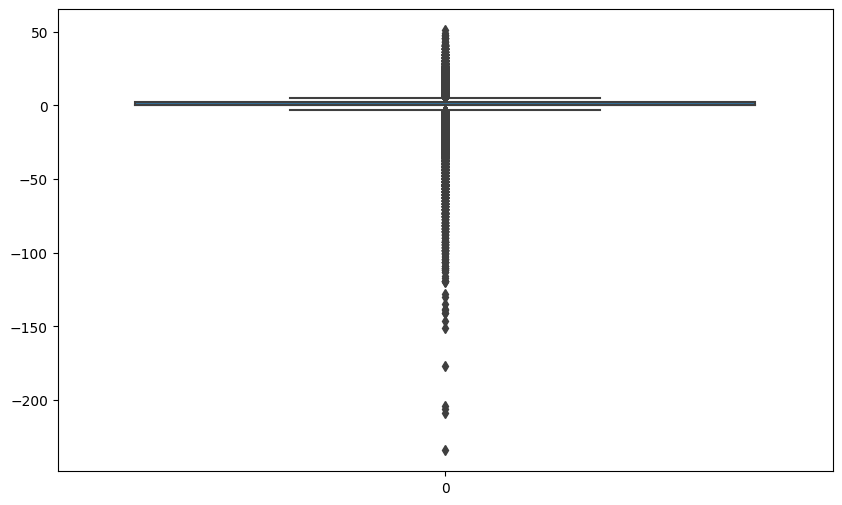

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(train_df['Difference btw Arrival and Departure'])

In [201]:
train_df.describe([.25, .5, .75, .8, .9, .95])['Difference btw Arrival and Departure']

count    103904.000000
mean         -0.429454
std          10.093085
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
80%           4.000000
90%           9.000000
95%          13.000000
max          51.000000
Name: Difference btw Arrival and Departure, dtype: float64

#### _So, I'm going to group my data by type of travel and class and just fill in the null values with the corresponding mean or median values from the groupby_

In [202]:
columns_with_missing_data = train_df.isna().sum().sort_values(ascending=False)[train_df.isna().sum().sort_values(ascending=False) > 0]
columns_with_missing_data

Departure/Arrival time convenient    5300
Ease of Online booking               4487
Inflight wifi service                3103
Online boarding                      2428
Leg room service                      472
Food and drink                        107
Inflight entertainment                 14
Cleanliness                            12
On-board service                        3
Inflight service                        3
Gate location                           1
Checkin service                         1
Seat comfort                            1
dtype: int64

In [203]:
train_df.groupby(['Type of Travel', 'Class']).mean()

Age  Flight Distance  Inflight wifi service  \
Type of Travel  Class                                                         
Business travel Business  41.719121      1714.857392               2.903295   
                Eco       35.709631       682.800267               2.931890   
                Eco Plus  38.984062       705.319280               3.121140   
Personal Travel Business  38.385257       819.633287               2.613118   
                Eco       38.276691       789.814482               2.574236   
                Eco Plus  38.298835       792.249445               2.545865   

                          Departure/Arrival time convenient  \
Type of Travel  Class                                         
Business travel Business                           3.012248   
                Eco                                2.907520   
                Eco Plus                           2.918580   
Personal Travel Business                           3.763095   
                Eco                                3.750921   
                Eco Plus                           3.752563   

                          Ease of Online booking  Gate location  \
Type of Travel  Class                                             
Business travel Business                3.058833       2.985392   
                Eco                     2.850462       3.042306   
                Eco Plus                2.965785       3.017738   
Personal Travel Business                2.671373       2.929995   
                Eco                     2.625726       2.918152   
                Eco Plus                2.596481       2.913430   

                          Food and drink  Online boarding  Seat comfort  \
Type of Travel  Class                                                     
Business travel Business        3.334878         3.777577      3.774517   
                Eco             3.107894         2.941414      3.097645   
                Eco Plus        3.159618         3.106745      3.155013   
Personal Travel Business        3.112813         3.307911      3.461752   
                Eco             3.076382         2.892436      3.170341   
                Eco Plus        3.099249         2.877132      3.214761   

                          Inflight entertainment  On-board service  \
Type of Travel  Class                                                
Business travel Business                3.664204          3.703821   
                Eco                     3.141849          2.910944   
                Eco Plus                3.200257          2.814396   
Personal Travel Business                3.012054          3.148354   
                Eco                     3.065275          3.280504   
                Eco Plus                3.082963          3.299390   

                          Leg room service  Baggage handling  Checkin service  \
Type of Travel  Class                                                           
Business travel Business          3.686167          3.865665         3.527691   
                Eco               3.072271          3.259416         2.840006   
                Eco Plus          3.034961          3.172494         2.732648   
Personal Travel Business          2.921578          3.341678         3.333333   
                Eco               3.132310          3.596723         3.337662   
                Eco Plus          3.124579          3.570200         3.324362   

                          Inflight service  Cleanliness  \
Type of Travel  Class                                     
Business travel Business          3.868098     3.489390   
                Eco               3.260108     3.091439   
                Eco Plus          3.171722     3.116088   
Personal Travel Business          3.331943     3.224386   
                Eco               3.619790     3.121187   
                Eco Plus          3.622364     3.150943   

                          Departure Delay in Minutes  \
Type of Travel  C

In [204]:
train_df.groupby(['Type of Travel', 'Class']).median()

Age  Flight Distance  Inflight wifi service  \
Type of Travel  Class                                                    
Business travel Business  42.0           1633.0                    3.0   
                Eco       35.0            578.0                    3.0   
                Eco Plus  37.0            563.0                    3.0   
Personal Travel Business  38.0            645.0                    3.0   
                Eco       38.0            628.0                    3.0   
                Eco Plus  38.0            612.0                    3.0   

                          Departure/Arrival time convenient  \
Type of Travel  Class                                         
Business travel Business                                3.0   
                Eco                                     3.0   
                Eco Plus                                3.0   
Personal Travel Business                                4.0   
                Eco                                     4.0   
                Eco Plus                                4.0   

                          Ease of Online booking  Gate location  \
Type of Travel  Class                                             
Business travel Business                     3.0            3.0   
                Eco                          3.0            3.0   
                Eco Plus                     3.0            3.0   
Personal Travel Business                     3.0            3.0   
                Eco                          3.0            3.0   
                Eco Plus                     3.0            3.0   

                          Food and drink  Online boarding  Seat comfort  \
Type of Travel  Class                                                     
Business travel Business             3.0              4.0           4.0   
                Eco                  3.0              3.0           3.0   
                Eco Plus             3.0              3.0           3.0   
Personal Travel Business             3.0              3.0           4.0   
                Eco                  3.0              3.0           3.0   
                Eco Plus             3.0              3.0           3.0   

                          Inflight entertainment  On-board service  \
Type of Travel  Class                                                
Business travel Business                     4.0               4.0   
                Eco                          3.0               3.0   
                Eco Plus                     3.0               3.0   
Personal Travel Business                     3.0               3.0   
                Eco                          3.0               3.0   
                Eco Plus                     3.0               3.0   

                          Leg room service  Baggage handling  Checkin service  \
Type of Travel  Class                                                           
Business travel Business               4.0               4.0              4.0   
                Eco                    3.0               3.0              3.0   
                Eco Plus               3.0               3.0              3.0   
Personal Travel Business               3.0               4.0              3.0   
                Eco                    3.0               4.0              3.0   
                Eco Plus               3.0               4.0              3.0   

                          Inflight service  Cleanliness  \
Type of Travel  Class                                     
Business travel Business               4.0          4.0   
                Eco                    3.0          3.0   
                Eco Plus               3.0          3.0   
Personal Travel Business               4.0          3.0   
                Eco                    4.0          3.0   
                Eco Plus               4.0          3.0   

                          Departure Delay in Minutes  \
Type of Travel  Class                               

#### _median value it is_

#### _This is me from the future. So when I imputed this missing data with the groupby median, my models performed worse. So, I'm just going to replace them back with 0 their original vavlue._

In [205]:
# I'm not going to lie i don't really know how exactly this works i only have a little idea
# for columns in columns_with_missing_data.index:
#     train_df[columns] = train_df.groupby(['Type of Travel', 'Class'])[columns].transform(lambda x: x.fillna(x.median()))

In [206]:
## hi Adebola in this night that you are suffereing i added this code so you'd rememeber in case you are looking for where the error is coming from
for columns in columns_with_missing_data.index:
    train_df[columns].fillna(0, inplace=True)

In [207]:
train_df.isna().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
satisfaction                            0
Total Delay in Minutes            

In [208]:
train_df.duplicated().sum()

0

#### __TIME FOR SOME FEATURE ENGINEERING__

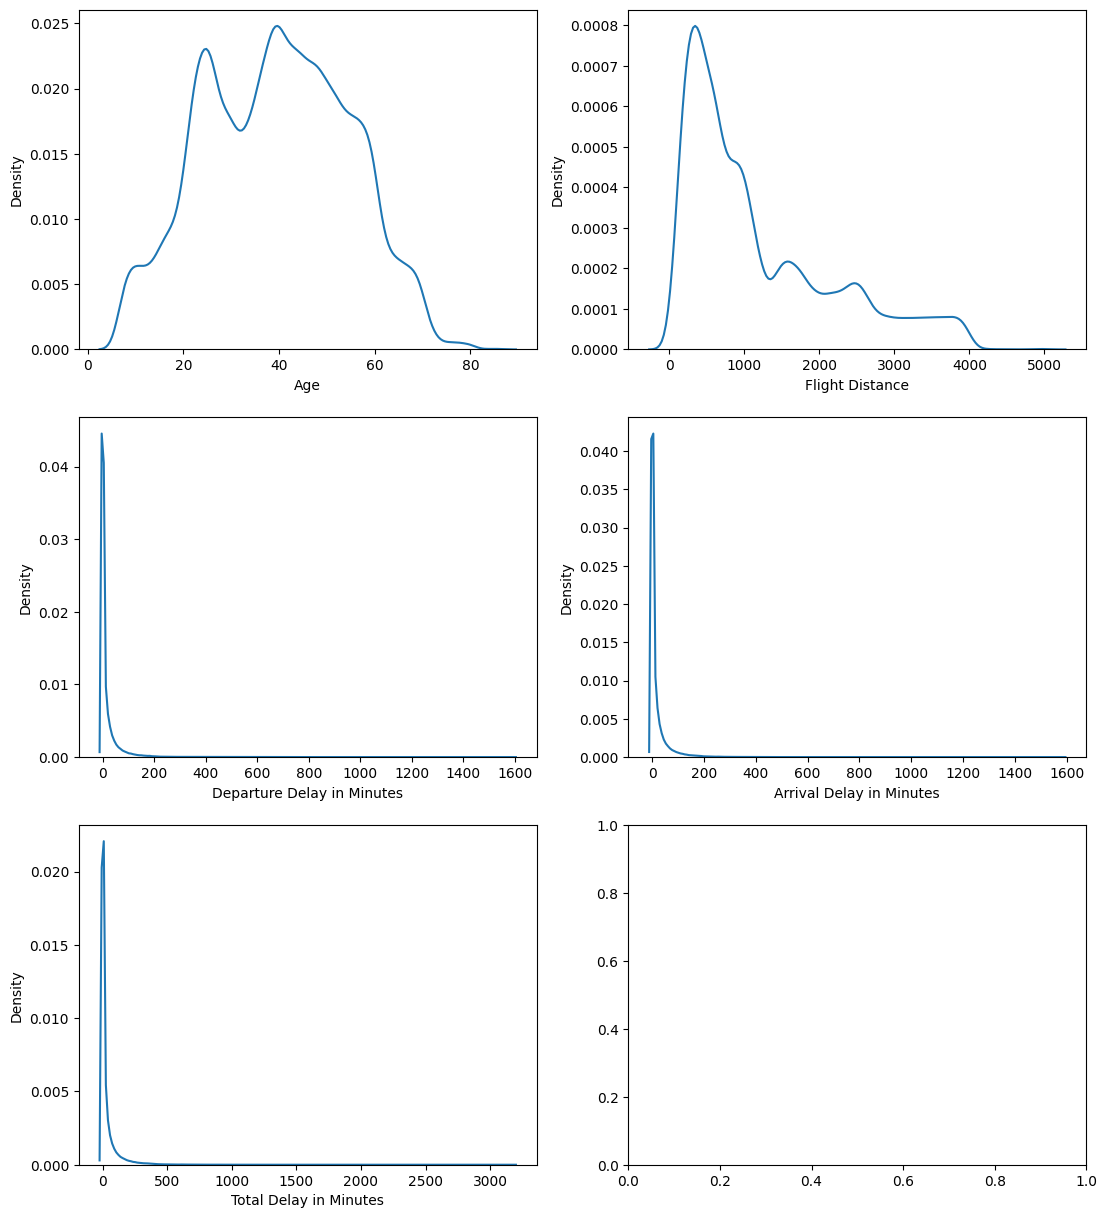

In [209]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13, 15))
ax = ax.flatten()

for i, columns in enumerate(train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes']].columns):
    sns.kdeplot(x=columns, data=train_df, ax=ax[i])

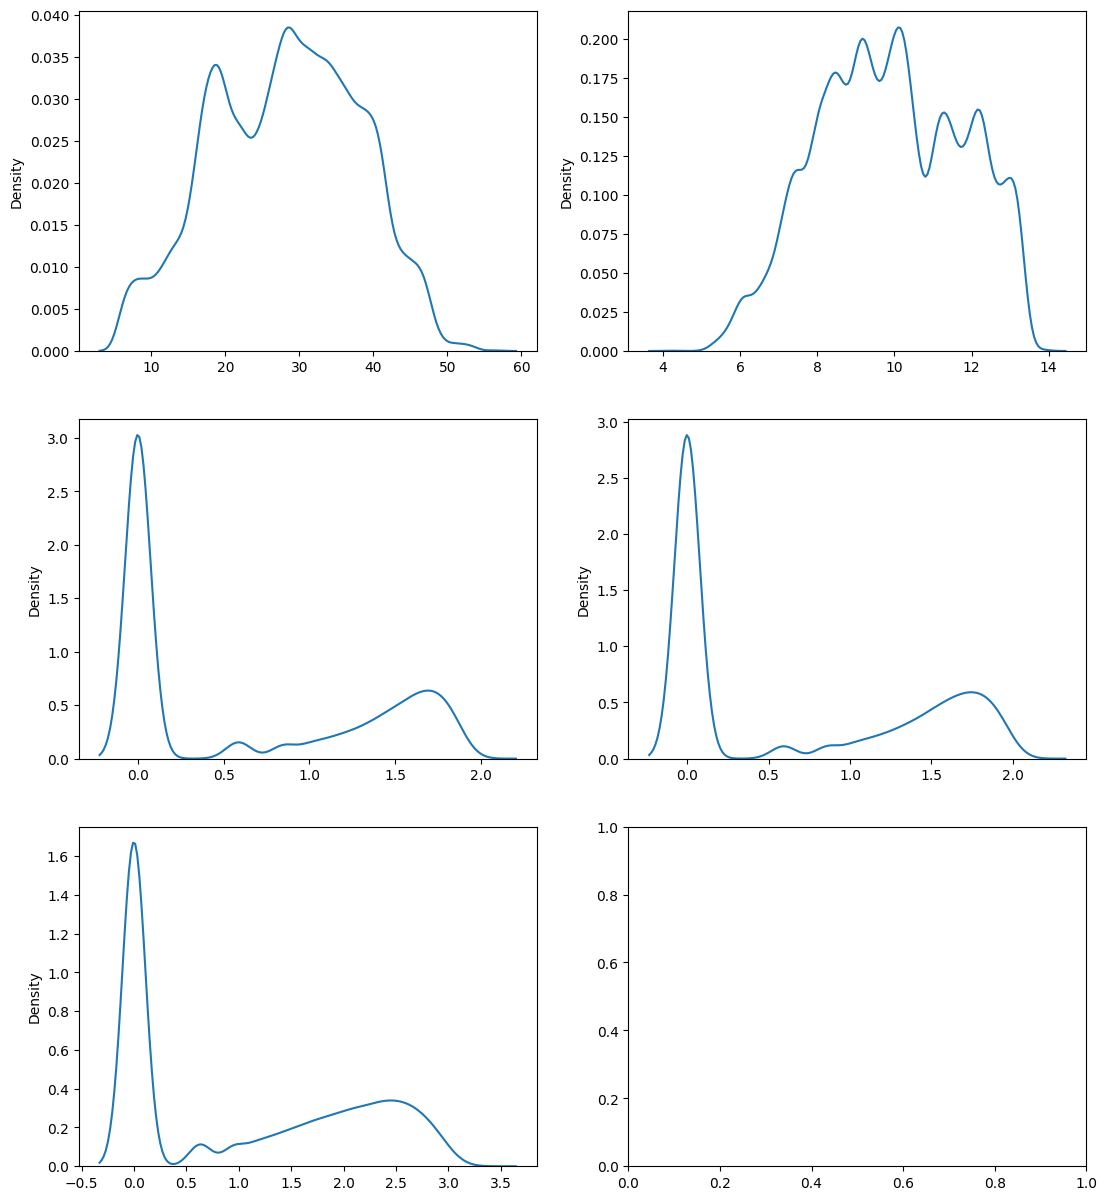

In [210]:
from scipy.stats import boxcox

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13, 15))
ax = ax.flatten()

for i, columns in enumerate(train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes']].columns):
    sns.kdeplot(x=boxcox(train_df[columns] + 1)[0], ax=ax[i])

In [211]:
lambdas = {}
for i, columns in enumerate(train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes']].columns):
    train_df[columns], lambdas[columns] = boxcox(train_df[columns] + 1)

In [212]:
train_df['Total Ratings'] = 0
for columns in ordinal_features.columns:
    train_df['Total Ratings'] += train_df[columns]

<AxesSubplot:xlabel='Total Ratings', ylabel='Density'>

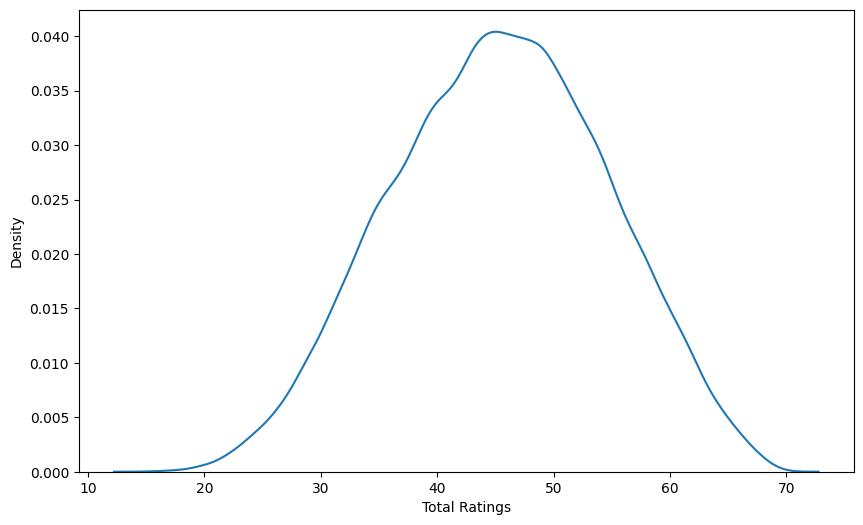

In [213]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Total Ratings', data=train_df)

In [214]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,Difference btw Arrival and Departure,Total Ratings
0,Male,Loyal Customer,10.473719,Personal Travel,Eco Plus,8.662768,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,1.625248,1.607726,0,2.384245,7.0,54.0
1,Male,disloyal Customer,18.893421,Business travel,Business,7.418821,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,0.587502,1.282794,0,1.596700,-5.0,32.0
2,Female,Loyal Customer,19.570573,Business travel,Business,10.498288,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0.000000,0.000000,1,0.000000,0.0,52.0
3,Female,Loyal Customer,18.893421,Business travel,Business,9.051686,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,1.435354,1.416404,0,2.085833,2.0,42.0
4,Male,Loyal Customer,41.934082,Business travel,Business,7.252627,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0.000000,0.000000,1,0.000000,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,17.529659,Business travel,Eco,7.062176,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,1.005512,0.000000,0,1.159168,3.0,31.0
103900,Male,Loyal Customer,34.498447,Business travel,Business,12.085476,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,0.000000,0.000000,1,0.000000,0.0,61.0
103901,Male,disloyal Customer,22.250549,Business travel,Business,11.716657,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,1.302929,1.543777,0,2.106383,-7.0,43.0
103902,Female,disloyal Customer,16.842758,Business travel,Eco,10.218899,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,0.000000,0.000000,0,0.000000,0.0,32.0


In [215]:
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['Customer Type'] = train_df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
train_df = pd.get_dummies(data=train_df, columns=['Class'], drop_first=True)

<AxesSubplot:>

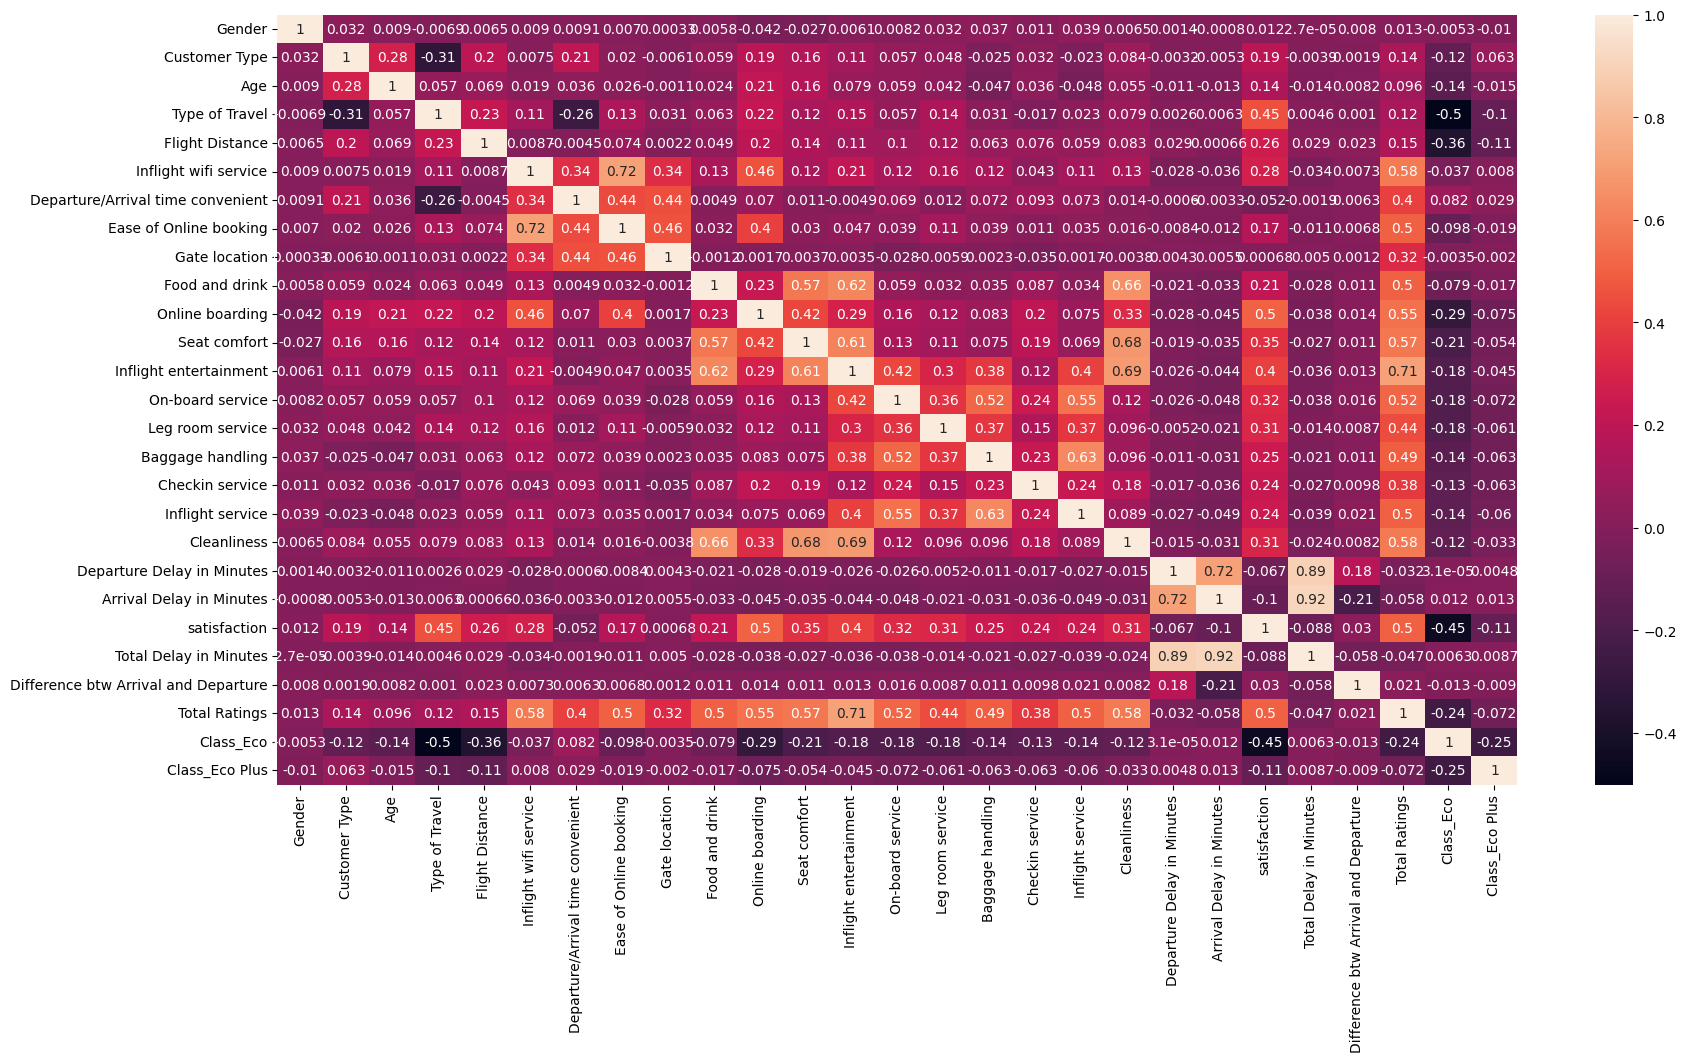

In [216]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True)

In [217]:
train_df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,Difference btw Arrival and Departure,Total Ratings,Class_Eco,Class_Eco Plus
0,1,1,10.473719,0,8.662768,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,1.625248,1.607726,0,2.384245,7.0,54.0,0,1
1,1,0,18.893421,1,7.418821,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,0.587502,1.282794,0,1.596700,-5.0,32.0,0,0
2,0,1,19.570573,1,10.498288,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0.000000,0.000000,1,0.000000,0.0,52.0,0,0
3,0,1,18.893421,1,9.051686,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,1.435354,1.416404,0,2.085833,2.0,42.0,0,0
4,1,1,41.934082,1,7.252627,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0.000000,0.000000,1,0.000000,0.0,49.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,17.529659,1,7.062176,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4,2.0,3.0,2.0,1.005512,0.000000,0,1.159168,3.0,31.0,1,0
103900,1,1,34.498447,1,12.085476,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5,5.0,5.0,4.0,0.000000,0.000000,1,0.000000,0.0,61.0,0,0
103901,1,0,22.250549,1,11.716657,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,1.302929,1.543777,0,2.106383,-7.0,43.0,0,0
103902,0,0,16.842758,1,10.218899,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1,5.0,4.0,1.0,0.000000,0.000000,0,0.000000,0.0,32.0,1,0


## __TIME FOR SOME MACHINE LEARNING STUFF YAY__

In [218]:
# X = train_df.drop(['satisfaction', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes'], axis=1) #closest
X = train_df.drop(['satisfaction', 'Total Ratings', 'Total Delay in Minutes', 'Difference btw Arrival and Departure'], axis=1) #closest
y = train_df['satisfaction']

In [219]:
sscaler = StandardScaler()
X = sscaler.fit_transform(X)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20082005)

In [221]:
logit_reg2 = LogisticRegression(max_iter=1000)
logit_reg2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [222]:
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20082005)
scores_logit_reg2 = cross_val_score(estimator=logit_reg2, X=X, y=y, cv=strat_kf)

In [223]:
y_test_pred = logit_reg2.predict(X_test)
print(f'CV scores for Logistic Regression model: {scores_logit_reg2}')
print(f'CV accuracy for Logistic Regression model: {np.mean(scores_logit_reg2)} +/- {np.std(scores_logit_reg2)}')

CV scores for Logistic Regression model: [0.8750782  0.87594437 0.87320148 0.87753236 0.87502406]
CV accuracy for Logistic Regression model: 0.8753560947409808 +/- 0.0014079797978107068


LogisticRegression score on test set: 0.8733939656416919
LogisticRegression MSE on test set: 0.12660603435830806


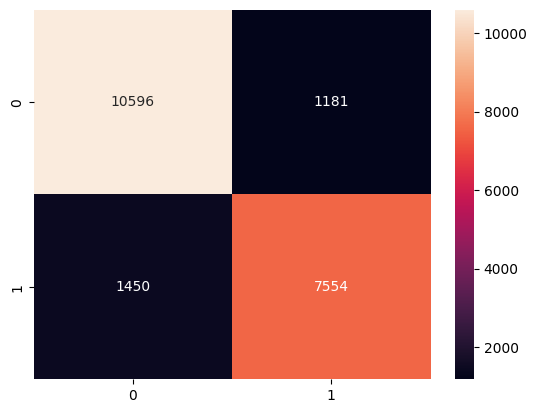

In [224]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'LogisticRegression score on test set: {logit_reg2.score(X_test, y_test)}')
print(f'LogisticRegression MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _As we can see brethren and sisters, we got an increase in the model's score. The model didn't underfit less than the previous one and there wasn't really any overfitting as the scores across the folds were comparable and even similar to the score on the test set_

In [225]:
random_forestclf2 = RandomForestClassifier()
random_forestclf2.fit(X_train, y_train)

RandomForestClassifier()

In [226]:
# model performaance
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20082005)
scores_randomforest2 = cross_val_score(random_forestclf2, X, y, cv=strat_kf)

In [227]:
y_test_pred = random_forestclf2.predict(X_test)
print(f'CV scores for RandomForestClassifier: {scores_randomforest2}')
print(f'CV mean accuracy for RandomForestClassifier: {np.mean(scores_randomforest2)} +/- {np.std(scores_randomforest2)}')

CV scores for RandomForestClassifier: [0.96169578 0.96232135 0.9615033  0.96073336 0.96010587]
CV mean accuracy for RandomForestClassifier: 0.9612719321098216 +/- 0.0007725558524003169


RandomForestClassifier score on test set: 0.9587604061402243
RandomForestClassifier MSE on test set: 0.041239593859775756


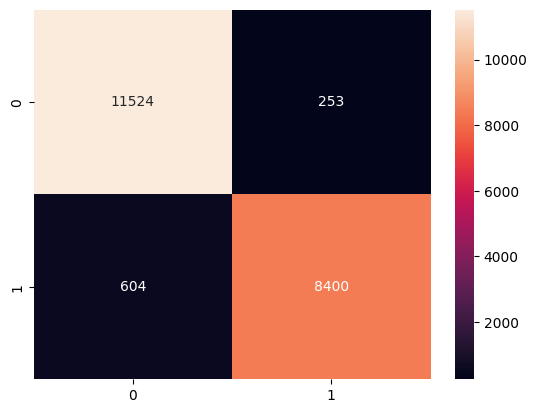

In [228]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'RandomForestClassifier score on test set: {random_forestclf2.score(X_test, y_test)}')
print(f'RandomForestClassifier MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

In [229]:
from xgboost import XGBClassifier

In [230]:
xgb_model = XGBClassifier(random_state=20082005)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=20082005, ...)

In [231]:
# model performaance
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20082005)
scores_xgb = cross_val_score(xgb_model, X, y, cv=strat_kf)

In [232]:
y_test_pred = xgb_model.predict(X_test)
print(f'CV scores for XGBClassifier: {scores_xgb}')
print(f'CV mean accuracy for XGBClassifier: {np.mean(scores_xgb)} +/- {np.std(scores_xgb)}')

CV scores for XGBClassifier: [0.96333189 0.96256196 0.96217699 0.96198451 0.96193455]
CV mean accuracy for XGBClassifier: 0.9623979782931761 +/- 0.0005164569976273544


XGBClassifier score on test set: 0.9604927578076127
XGBClassifier MSE on test set: 0.03950724219238728


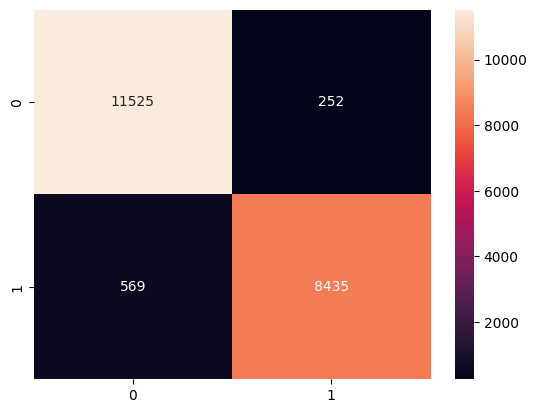

In [233]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'XGBClassifier score on test set: {xgb_model.score(X_test, y_test)}')
print(f'XGBClassifier MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

In [234]:
from catboost import CatBoostClassifier

In [235]:
cb_model = CatBoostClassifier(silent=True, random_state=20082005)
cb_model.fit(X_train, y_train)

In [236]:
# model performaance
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20082005)
scores_cb = cross_val_score(cb_model, X, y, cv=strat_kf)

In [237]:
y_test_pred = cb_model.predict(X_test)
print(f'CV scores for CatBoostClassifier: {scores_cb}')
print(f'CV mean accuracy for CatBoostClassifier: {np.mean(scores_cb)} +/- {np.std(scores_cb)}')

CV scores for CatBoostClassifier: [0.9647274  0.96338001 0.96429431 0.96376498 0.96304139]
CV mean accuracy for CatBoostClassifier: 0.9638416153350267 +/- 0.0006080880476377204


XGBClassifier score on test set: 0.9620326259564025
XGBClassifier MSE on test set: 0.03796737404359752


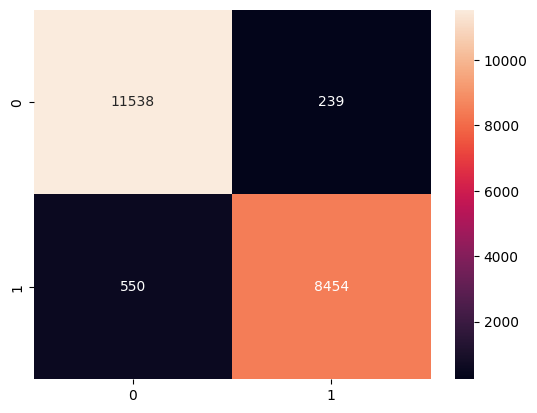

In [238]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'XGBClassifier score on test set: {cb_model.score(X_test, y_test)}')
print(f'XGBClassifier MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _So, We can see that the best performing model is the XGBClassifier. Now lemme see how it actually generalizes_

#### _Let me apply all mmy transformations to it_

In [239]:
test_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [240]:
test_df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [241]:
arrival_null_index = (test_df['Arrival Delay in Minutes'].isnull()[test_df['Arrival Delay in Minutes'].isnull() == True]).index
test_df.loc[arrival_null_index, 'Arrival Delay in Minutes'] = test_df.loc[arrival_null_index, 'Departure Delay in Minutes']

In [242]:
test_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [243]:
test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['Customer Type'] = test_df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
test_df = pd.get_dummies(data=test_df, columns=['Class'], drop_first=True)
test_df['satisfaction'] = test_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [244]:
X_cv = test_df.drop('satisfaction', axis='columns')
y_cv = test_df['satisfaction']

In [245]:
for column in X_cv:
    if column in lambdas:
        X_cv[column] = boxcox((X_cv[column] + 1), lmbda=lambdas[column])

In [246]:
X_cv = sscaler.transform(X_cv)

In [247]:
y_cv_pred = cb_model.predict(X_cv)

XGBClassifier score on test set: 0.9633892824145365
XGBClassifier MSE on test set: 0.036610717585463505


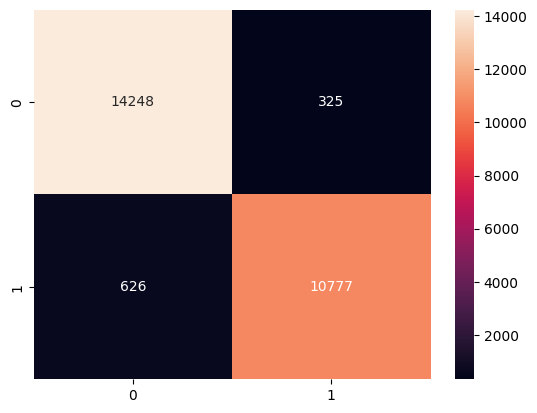

In [248]:
sns.heatmap(confusion_matrix(y_cv, y_cv_pred), annot=True, fmt='.5g')
print(f'XGBClassifier score on test set: {cb_model.score(X_cv, y_cv)}')
print(f'XGBClassifier MSE on test set: {mean_squared_error(y_cv, y_cv_pred)}')

#### _We can see that our model actually generalized well, no overfitting or underfitting. Yayyyyy_

In [249]:
import pickle
model_and_transformers = {'model':cb_model, 'scaler': sscaler, 'lambdas': lambdas}

In [250]:
with open('Model and Transformers.pickle', 'wb') as m:
    pickle.dump(model_and_transformers, m)

In [251]:
with open('Model and Transformers.pickle', 'rb') as m:
    loaded_data = pickle.load(m)

In [252]:
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']
loaded_lambdas = loaded_data['lambdas']

In [328]:
data_point = test_df.sample(1)
X_data_point = data_point.drop('satisfaction', axis=1)
y_data_point = data_point['satisfaction']
y_data_point

25746    1
Name: satisfaction, dtype: int64

In [329]:
X_data_point

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
25746,1,1,41,1,280,4,4,4,4,3,4,2,3,3,4,3,4,3,1,0,0.0,0,0


In [330]:
for column in X_data_point:
    if column in loaded_lambdas:
        X_data_point[column] = boxcox(X_data_point[column] + 1, loaded_lambdas[column])
X_data_point = loaded_scaler.transform(X_data_point)

In [331]:
y_data_point_pred = loaded_model.predict(X_data_point)
y_data_point_pred

array([1], dtype=int64)